DSC 540

Final Project

CJ Craig

### Abstract

The main problem (excluding research questions 2-4) we are trying to solve, is "Can we predict income class (low income or above) by the features given in our 2017 census dataset?". Our solution to solve this problem was to apply multiple classification techniques, including: K Nearest Neighbor, Logistic Regression, Naive Bayes, Support Vector Machines, Linear Discriminant Analysis, Decision Tree, and Random Forest. 

First, we implanted the aforementioned classification methods with default parameters, then compared they’re through the use of the classification report and the ROC curve. This allowed is to gain insight in myriad of ways, through not just looking at accuracy, but also looking at the ability for the metric to separate classes. Next, we then tried different parameters with our classifiers to see if we could improve performance. This allowed us to choose a “best” model from comparing the parameters, and seeing which performs best. 

In terms of accuracy - what resulted from the default parameters were a high performance of Logistic Regression, Random Forest, and Linear Discriminant Analysis that include accuracy scores of 88%,88%, and 87%. What resulted from the tuned parameters were a high performance of nearly the same variables with slightly higher accuracies.
We were also able to analysis performance of the ability to separate classes through implementation of a ROC curve. High performers for default parameters were Logistic Regression, Random Forest, and Linear Discriminant Analysis. High performers for tuned parameters were Logistic Regression, Support Vector Machine, and Random Forest.

Overall, we were able to see the capability of different classifier, and see what happened when different parameters are applied. There seems to be endless possibilities with our project, but we were able to see results looked at in one of many ways.


### Introduction

We are using the US Census Demographic Data by [Kaggle](https://www.kaggle.com/muonneutrino/us-census-demographic-data) however, we did incorporate [Longitude and Latitude](https://en.wikipedia.org/wiki/User:Michael_J/County_table) attributes for each county to create some geo-map visualizations. 

We have created our class variable called Low_Income_Class from the provided attribute “Income”. A county is considered Low Income if the average income is 48,500 (U.S. Dollars) and is considered Above if the average county income is greater than 48,500. We are performing classification to identify what characteristics make a county low income or not. We then will compare the performance of these different classifications through the use of a confusion matrix, accuracy, and a ROC curve.


Our group wanted to work on this, because it is difficult to know why certain areas are low income compared to others. We believe that our analysis can provide some insight into what factors are important and may predict low/above income at a county level and at a state level.


The benefit/value of this project is not only to offer insight on what makes a county low income, but also potentially look further into what policies and funding could help mitigate negative factors or accelerate positive factors. This could come from socioeconomic variables, but potentially geographic or other variables.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.getcwd()

'C:\\Users\\cjcbg\\Desktop\\DSC 540'

In [2]:
#downgrade matplotlib for better viz
!pip install matplotlib==3.1.0 --user

In [3]:
#relevant sklearn packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 
from sklearn import neighbors, naive_bayes, feature_selection      
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

#Packages for potential slider in map viz
import json
from bokeh.io import show
from bokeh.models import (CDSView, ColorBar, ColumnDataSource, CustomJS,
                          CustomJSFilter, GeoJSONDataSource, HoverTool,
                          LinearColorMapper, Slider)
from bokeh.layouts import column, row, widgetbox
from bokeh.palettes import brewer
from bokeh.plotting import figure


#Decision Tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

#don't show warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('acs2017_county_data.csv',index_col = 0)
df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,2.7,75.4,18.9,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,4.4,83.1,9.5,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,4.2,45.7,47.8,...,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,2.4,74.6,22.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,9.0,87.4,1.5,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,Low Income


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220 entries, 1001 to 72153
Data columns (total 39 columns):
State               3220 non-null object
County              3220 non-null object
Lat                 2887 non-null float64
Long                2887 non-null float64
TotalPop            3220 non-null int64
Men                 3220 non-null int64
Women               3220 non-null int64
Hispanic            3220 non-null float64
White               3220 non-null float64
Black               3220 non-null float64
Native              3220 non-null float64
Asian               3220 non-null float64
Pacific             3220 non-null float64
VotingAgeCitizen    3220 non-null int64
Income              3220 non-null int64
IncomeErr           3220 non-null int64
IncomePerCap        3220 non-null int64
IncomePerCapErr     3220 non-null int64
Poverty             3220 non-null float64
ChildPoverty        3219 non-null float64
Professional        3220 non-null float64
Service             3220 

In [6]:
df.shape

(3220, 39)

In [7]:
df.isna().sum()

State                 0
County                0
Lat                 333
Long                333
TotalPop              0
Men                   0
Women                 0
Hispanic              0
White                 0
Black                 0
Native                0
Asian                 0
Pacific               0
VotingAgeCitizen      0
Income                0
IncomeErr             0
IncomePerCap          0
IncomePerCapErr       0
Poverty               0
ChildPoverty          1
Professional          0
Service               0
Office                0
Construction          0
Production            0
Drive                 0
Carpool               0
Transit               0
Walk                  0
OtherTransp           0
WorkAtHome            0
MeanCommute           0
Employed              0
PrivateWork           0
PublicWork            0
SelfEmployed          0
FamilyWork            0
Unemployment          0
Low_Income_Class      0
dtype: int64

In [8]:
df.isna().sum().sum()

667

In [9]:
df.describe()

,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
count,2887.000000,2887.000000,3.220000e+03,3.220000e+03,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3.220000e+03,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,38.236598,-91.659925,1.007681e+05,4.958781e+04,5.118032e+04,11.296584,74.920186,8.681957,1.768416,1.289379,...,3.244472,1.598696,4.736894,23.474534,4.709295e+04,74.863323,17.086118,7.772733,0.278820,6.665590
std,4.854977,11.306645,3.244996e+05,1.593212e+05,1.652164e+05,19.342522,23.056700,14.333571,7.422946,2.716191,...,3.891510,1.678232,3.073484,5.687241,1.558159e+05,7.647916,6.390868,3.855454,0.448073,3.772612
min,20.855931,-158.201970,7.400000e+01,3.900000e+01,3.500000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,5.100000,3.900000e+01,31.100000,4.400000,0.000000,0.000000,0.000000
25%,34.575923,-97.778470,1.121350e+04,5.645500e+03,5.553500e+03,2.100000,63.500000,0.600000,0.100000,0.200000,...,1.400000,0.800000,2.900000,19.600000,4.573000e+03,71.200000,12.700000,5.200000,0.100000,4.475000
50%,38.328061,-90.113984,2.584750e+04,1.287900e+04,1.299350e+04,4.100000,83.600000,2.000000,0.300000,0.600000,...,2.300000,1.300000,4.100000,23.200000,1.061150e+04,76.100000,15.900000,6.800000,0.200000,6.100000
75%,41.683746,-83.577052,6.660825e+04,3.301725e+04,3.359375e+04,10.000000,92.800000,9.500000,0.600000,1.200000,...,3.825000,1.900000,5.800000,27.000000,2.874725e+04,80.200000,19.900000,9.200000,0.300000,8.000000
max,48.842653,-67.609354,1.010572e+07,4.979641e+06,5.126081e+06,100.000000,100.000000,86.900000,90.300000,41.800000,...,59.200000,43.200000,33.000000,45.100000,4.805817e+06,88.800000,64.800000,38.000000,8.000000,40.900000


In [10]:
df_perc = pd.read_csv('acs2017_county_data.csv',index_col = 0)

In [11]:
df_perc['Hispanic']=df_perc['Hispanic'].div(100).round(3)
df_perc['White']=df_perc['White'].div(100).round(3)
df_perc['Black']=df_perc['Black'].div(100).round(3)
df_perc['Native']=df_perc['Native'].div(100).round(3)
df_perc['Asian']=df_perc['Asian'].div(100).round(3)
df_perc['Pacific']=df_perc['Pacific'].div(100).round(3)
#Poverty Rate
df_perc['Poverty']=df_perc['Poverty'].div(100).round(3)
df_perc['ChildPoverty']=df_perc['ChildPoverty'].div(100).round(3)
#type of work
df_perc['Professional']=df_perc['Professional'].div(100).round(3)
df_perc['Service']=df_perc['Service'].div(100).round(3)
df_perc['Office']=df_perc['Office'].div(100).round(3)
df_perc['Construction']=df_perc['Construction'].div(100).round(3)
df_perc['Production']=df_perc['Production'].div(100).round(3)
#commute
df_perc['Drive']=df_perc['Drive'].div(100).round(3)
df_perc['Carpool']=df_perc['Carpool'].div(100).round(3)
df_perc['Transit']=df_perc['Transit'].div(100).round(3)
df_perc['Walk']=df_perc['Walk'].div(100).round(3)
df_perc['OtherTransp']=df_perc['OtherTransp'].div(100).round(3)
df_perc['MeanCommute']=df_perc['MeanCommute'].div(100).round(3)
#type of employment
df_perc['PrivateWork']=df_perc['PrivateWork'].div(100).round(3)
df_perc['PublicWork']=df_perc['PublicWork'].div(100).round(3)
df_perc['SelfEmployed']=df_perc['SelfEmployed'].div(100).round(3)
df_perc['FamilyWork']=df_perc['FamilyWork'].div(100).round(3)
df_perc['Unemployment']=df_perc['Unemployment'].div(100).round(3)

In [12]:
df_perc2 = df_perc.copy() #set up for classification

In [13]:
df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,2.7,75.4,18.9,...,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,4.4,83.1,9.5,...,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,4.2,45.7,47.8,...,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,2.4,74.6,22.0,...,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,9.0,87.4,1.5,...,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9,Low Income


In [14]:
df_perc.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


**Exploratory Data Analysis (EDA) [30]: What data visualizations have you applied? What are your findings in the data before applying any data mining technique? At this stage sufficient EDA should have been done.**

Below is the order of our EDA:

1.) Correlation Matrix Heatmap

2.) Distribution of numeric variables

3.) Value Count Comparison of Classifiers

4.) Comparitive Distribtion Plots by Variable Within our Main Groups:
    
    a.) Income Class
    b.) Race & Gender
    c.) Poverty Level
    d.) Type of Worker
    e.) Commute Type
    f.) Work Sector
    g.) Unemployment
    
5.) Geopandas Plot of Income Class
     

**Analysis and Commentary is done throughout this segment**

In [15]:
corr_matrix = df.corr()

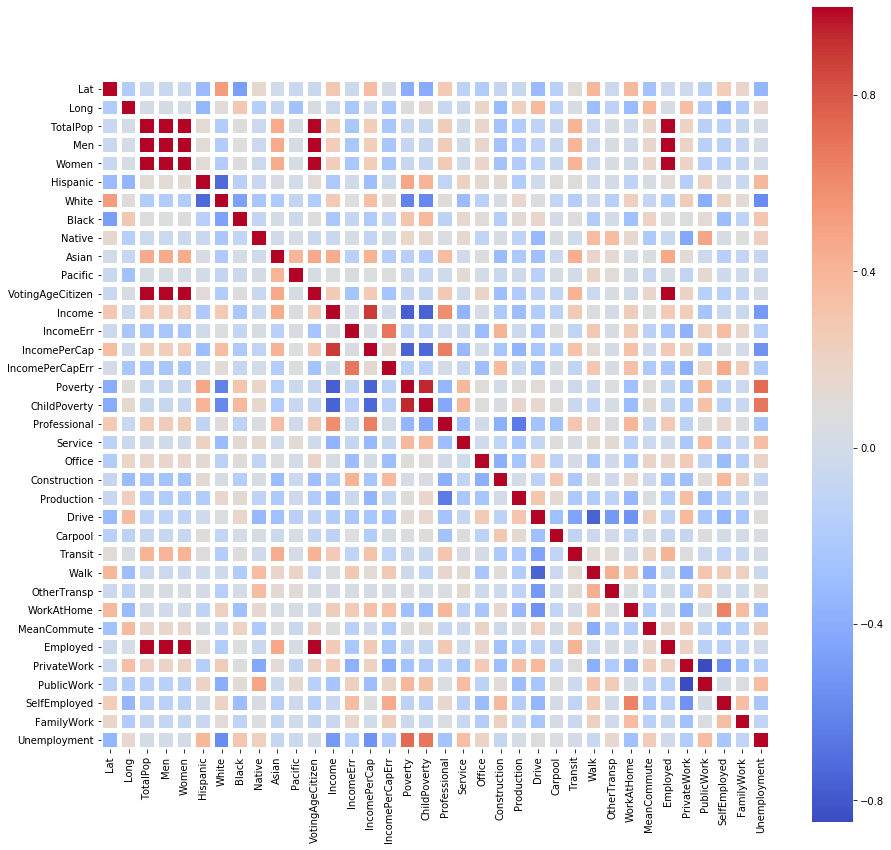

In [16]:
f,ax=plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix,cbar = True, square = True, annot = False, fmt = '.1f',xticklabels = True, yticklabels=True, cmap = 'coolwarm',linewidths = 4,ax=ax)
plt.show()

### **Postive Correlation Pairs:**

1.) Unemployment & Poverty

2.) Work at Home & Self Employment

3.) Income & Professional

4.) Work Environment

### **Negative Correlation Pairs:**

1.)  Income & Poverty Rate

2.) Income & Child Poverty Rate

3.) Unemployment Rate

4.) Income Per Capita

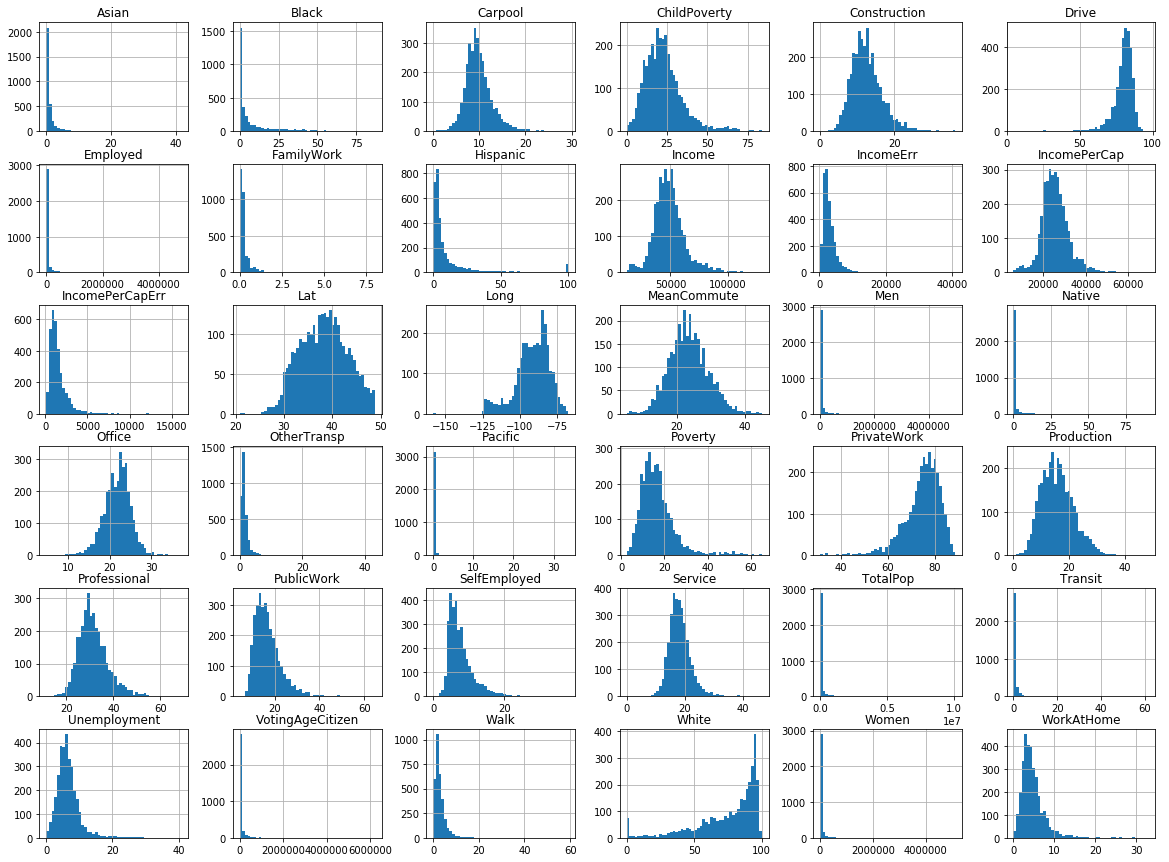

In [17]:
df.hist(bins = 50, figsize = (20,15))
plt.show()

Low Income    1708
Above         1512
Name: Low_Income_Class, dtype: int64


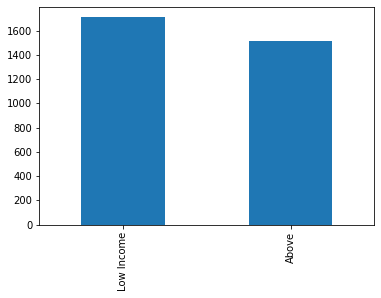

In [18]:
print(df.Low_Income_Class.value_counts())
df.Low_Income_Class.value_counts().plot.bar()
plt.show()

As we can see above, our class labels are pretty balanced. Specifically, when running accuracy scores vs. balanced accuracy scores, we did not see much of a difference. 

In [19]:
df_perc.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


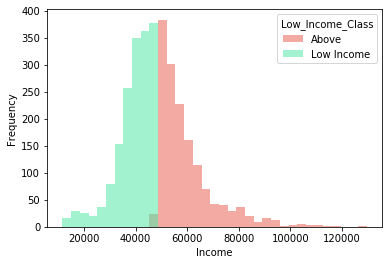

In [20]:
colors = ['#e96556', '#56e9a9'] #from color picker in google
df_perc.pivot(columns = "Low_Income_Class", values = "Income").plot.hist(bins = 35,alpha = .55, color = colors)
plt.xlabel('Income')
plt.show()

Looking at the distribution of our class, we can see that it is as intended, with the cutoff being at $48,500

In [21]:
race_gender = ['Men','Women',	'Hispanic','White',	'Black',	'Native',	'Asian','Pacific']
poverty = ['Poverty','ChildPoverty']
workers = ['Professional',	'Service'	,'Office',	'Construction',	'Production']
commute = ['Drive',	'Carpool',	'Transit','Walk',	'OtherTransp',	'WorkAtHome',	'MeanCommute']
sector  = ['PrivateWork','PublicWork',	'SelfEmployed','FamilyWork']
unemployment = ['Unemployment']

colors = ['#e96556', '#56e9a9'] #from color picker in google
def income_distb(lst):
  for i in lst:
    df_perc.pivot(columns = "Low_Income_Class", values = i).plot.hist(bins = 35,alpha = .55, color = colors)
    plt.xlabel(i)

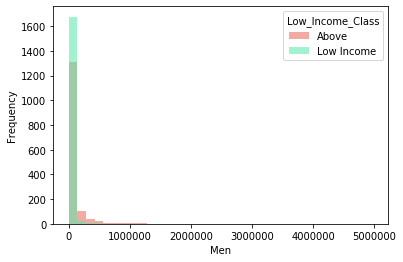

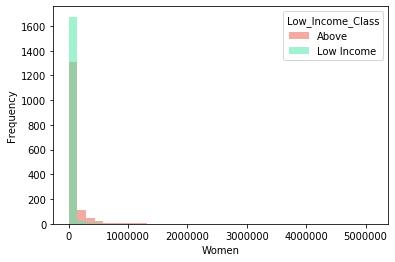

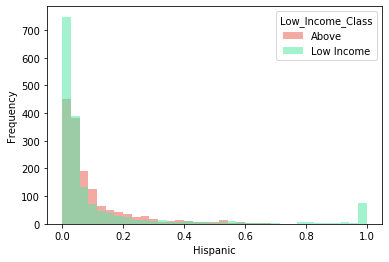

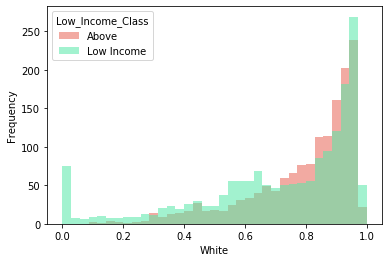

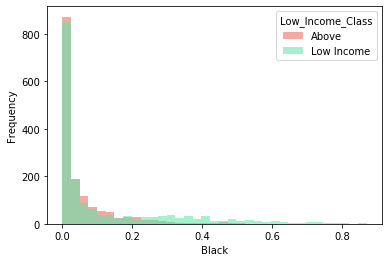

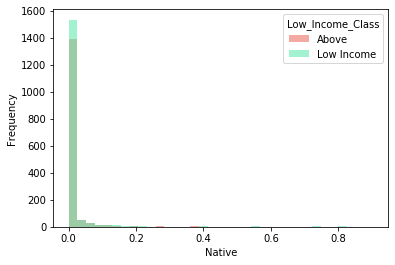

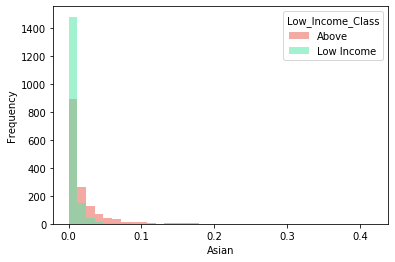

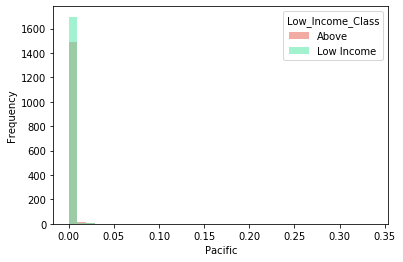

In [22]:
income_distb(race_gender)

### Race:
In the race distributions below, we can see the majority are skewed left with a higher frequency of Low income. Since this is at the county level it is pretty expected to have the left skew. Where we have a right skew, is the race category of whites. 

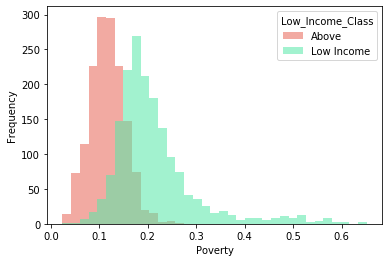

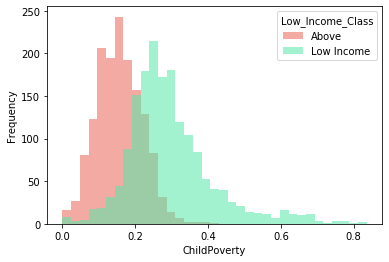

In [23]:
income_distb(poverty)

### Poverty:

From the above, we can gather that the less amount of poverty you have, the higher the frequency of above income people you have per county.

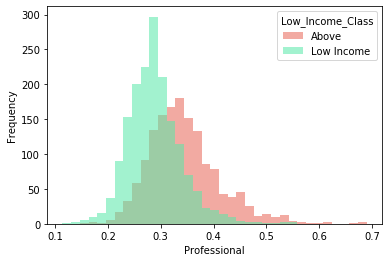

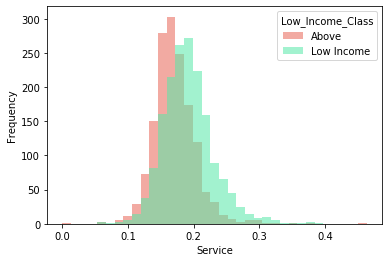

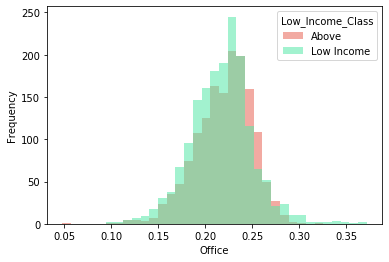

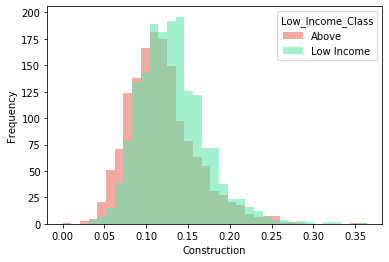

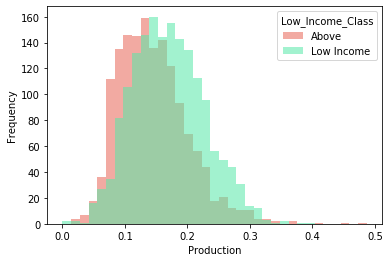

In [24]:
income_distb(workers)

### Worker Type:

From the above, where we saw the biggest discrepancy, was between the amount of professional workers. We can see that counties with higher amounts of professional works have larger amounts of above low income earners.

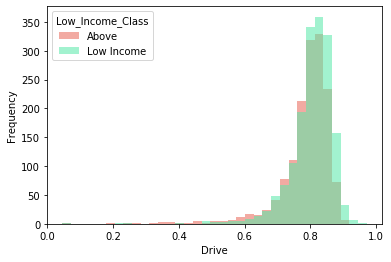

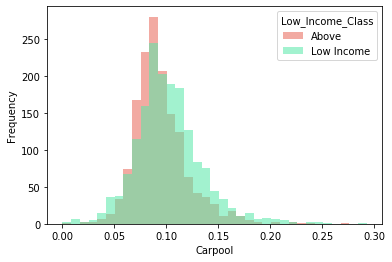

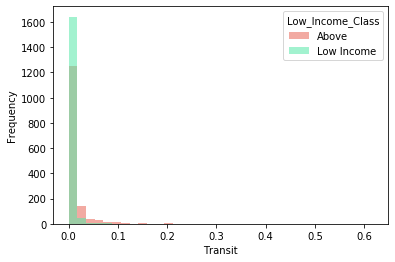

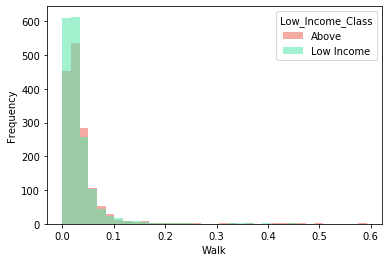

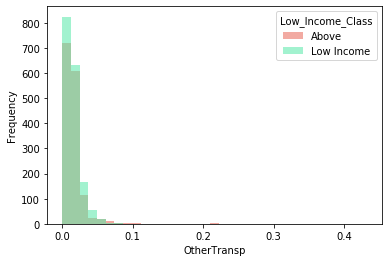

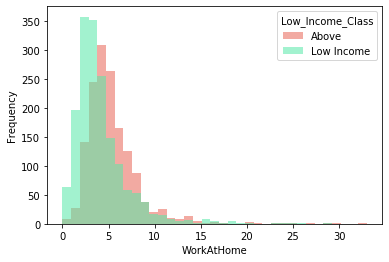

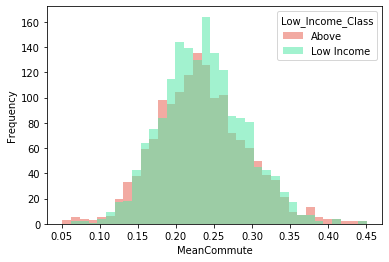

In [25]:
income_distb(commute)

### Commute Types:

The distribution of low income and above income earners were somewhat equal throughout. Where we saw the biggest difference was possibly with work at home. 

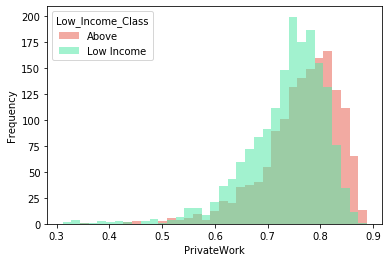

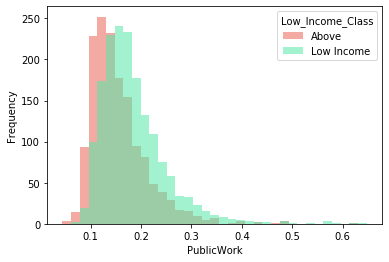

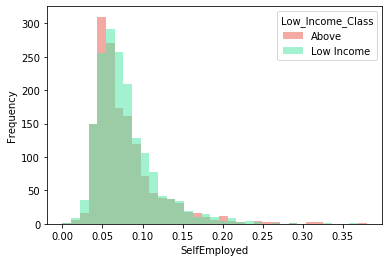

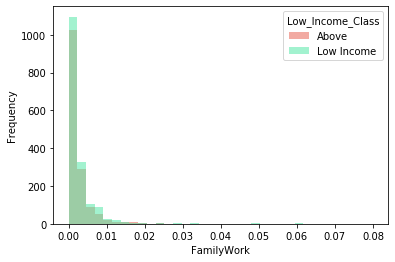

In [26]:
income_distb(sector)

### Work Sector:

The distribution of low income and above income earners were somewhat equal throughout. Where we saw the biggest difference was possibly with the amount of private work taken place in a county.

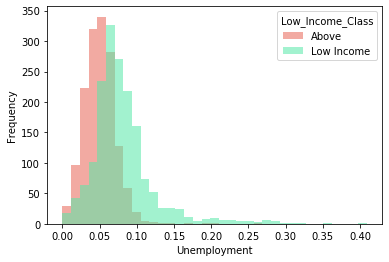

In [27]:
income_distb(unemployment)

### Unemployment:

Not suprisingly, we see that with higher unemployment, the higher the frequency of low income earners.

## **GeoPandas Viz**

In [28]:
#https://geopandas.org/gallery/plotting_with_geoplot.html
import shapefile as shp

In [29]:
us_dbf = shp.Reader('cb_2018_us_state_20m.dbf')

In [30]:
us_shx = shp.Reader('cb_2018_us_state_20m.shx')

In [31]:
conda install pandas fiona shapely pyproj rtree

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - fiona
    - pandas
    - pyproj
    - rtree
    - shapely


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py37h03978a9~ --> pkgs/main::conda-4.9.2-py37haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [32]:
conda install geopandas

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - geopandas


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py37h03978a9~ --> pkgs/main::conda-4.9.2-py37haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [33]:
conda install descartes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\ProgramData\Anaconda3

  added / updated specs:
    - descartes


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.9.2-py37h03978a9~ --> pkgs/main::conda-4.9.2-py37haa95532_0


Preparing transaction: ...working... done
Verifying transaction: ...working... failed

Note: you may need to restart the kernel to use updated packages.



EnvironmentNotWritableError: The current user does not have write permissions to the target environment.
  environment location: C:\ProgramData\Anaconda3




In [34]:
import shapefile

In [35]:
from shapely.geometry import Point, LineString
import geopandas as gpd
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_perc['Long'],df_perc['Lat'])]
geometry[:3]

In [36]:
state_map = gpd.read_file('cb_2018_us_state_20m.shp')
state_map.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."


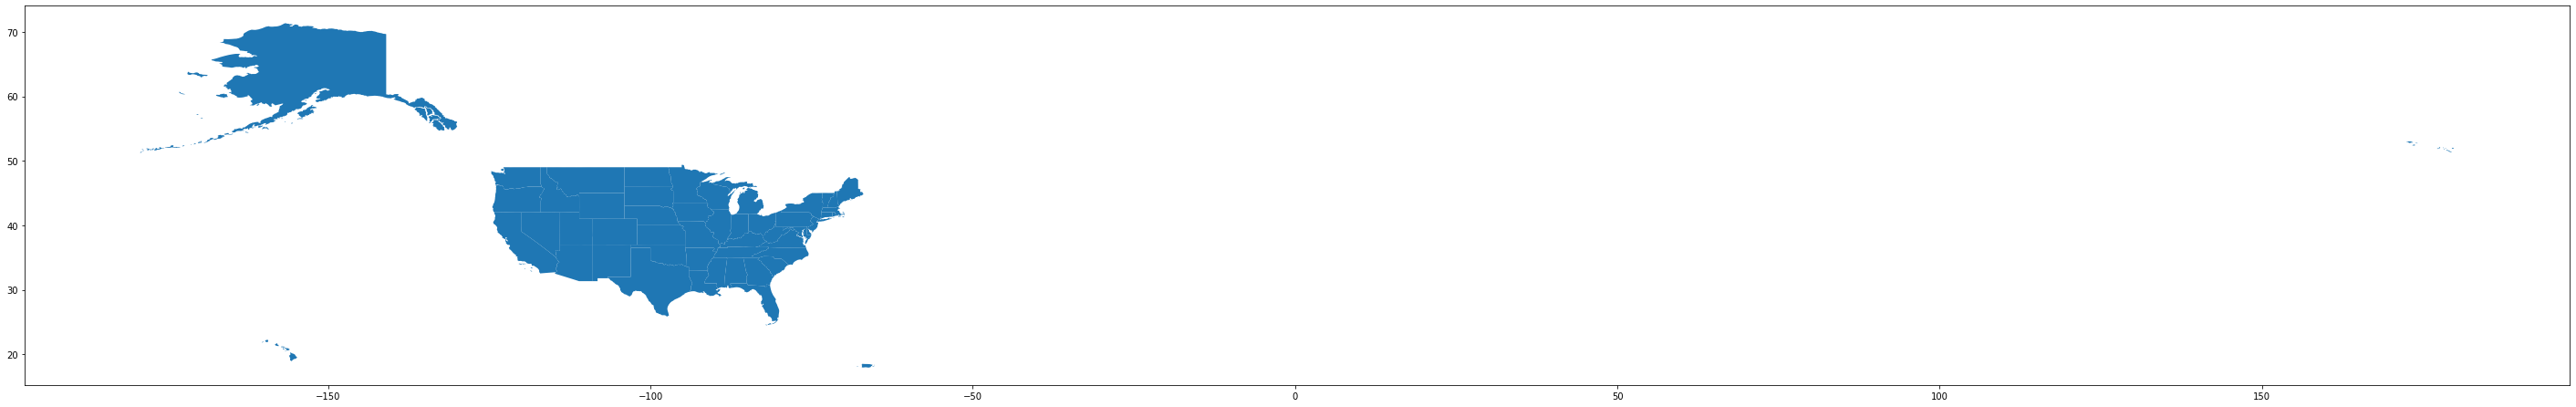

In [37]:
fig,ax = plt.subplots(figsize = (50,50))
state_map.plot(ax = ax)
plt.show()

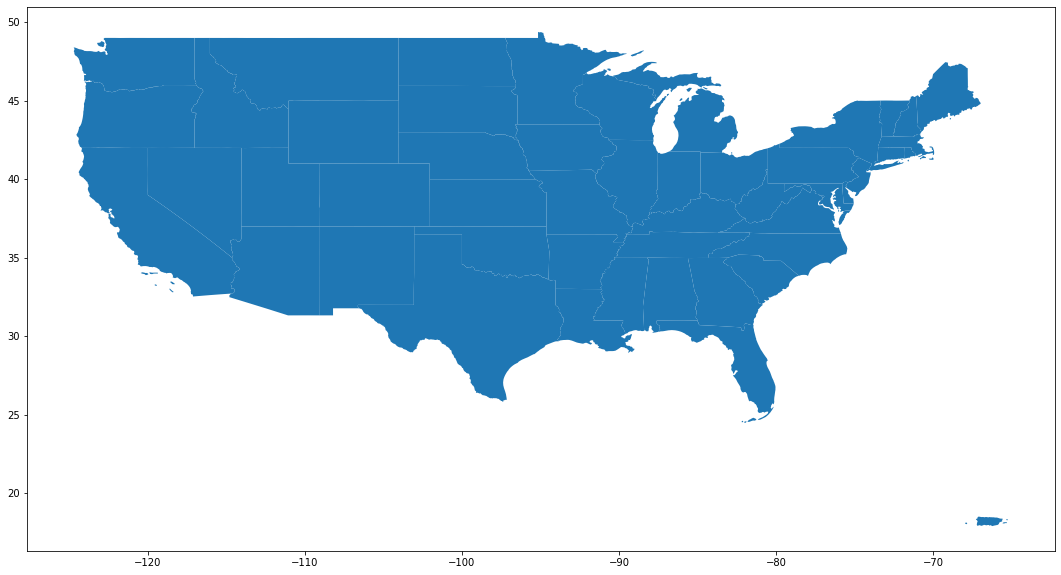

In [38]:
mainland = state_map[(state_map['NAME'] != 'Alaska') & (state_map['NAME'] != 'Hawaii')]
mainland.plot(figsize=(20, 10))
plt.show()

In [39]:
geo_df = gpd.GeoDataFrame(df_perc,crs = crs, geometry = geometry) #create geometry column
geo_df.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class,geometry
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above,POINT (-86.64449 32.53638)
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above,POINT (-87.74607 30.65922)
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income,POINT (-85.40546 31.87067)
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income,POINT (-87.12715 33.01589)
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income,POINT (-86.56725 33.97745)


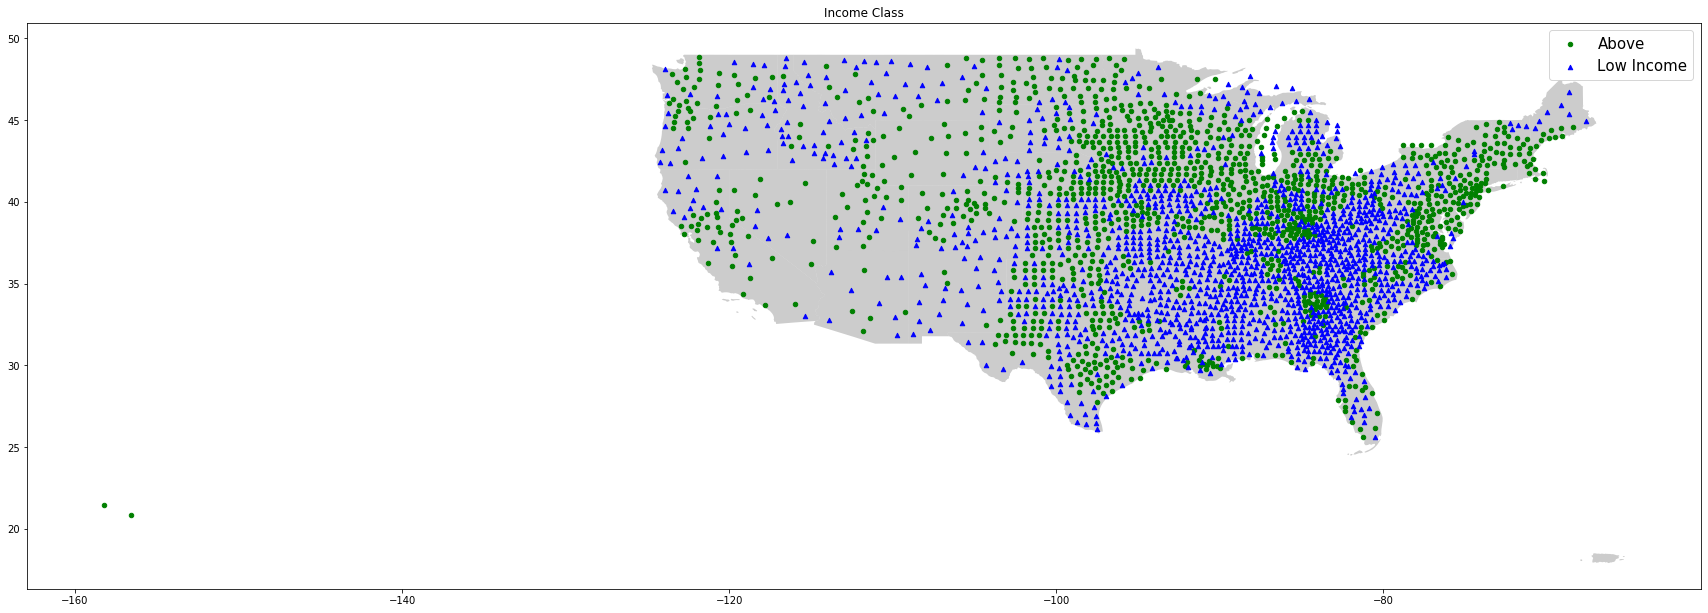

In [40]:
fig,ax = plt.subplots(figsize=(30, 20))
mainland.plot(ax = ax,alpha = .4,color = "grey")
geo_df[geo_df['Low_Income_Class']=='Above'].plot(ax = ax, markersize = 20, color = "green",marker = "o",label = "Above")
geo_df[geo_df['Low_Income_Class']=='Low Income'].plot(ax = ax, markersize = 20, color = "blue",marker = "^",label = "Low Income")
plt.legend(prop = {'size':15})
plt.title("Income Class")
plt.show()

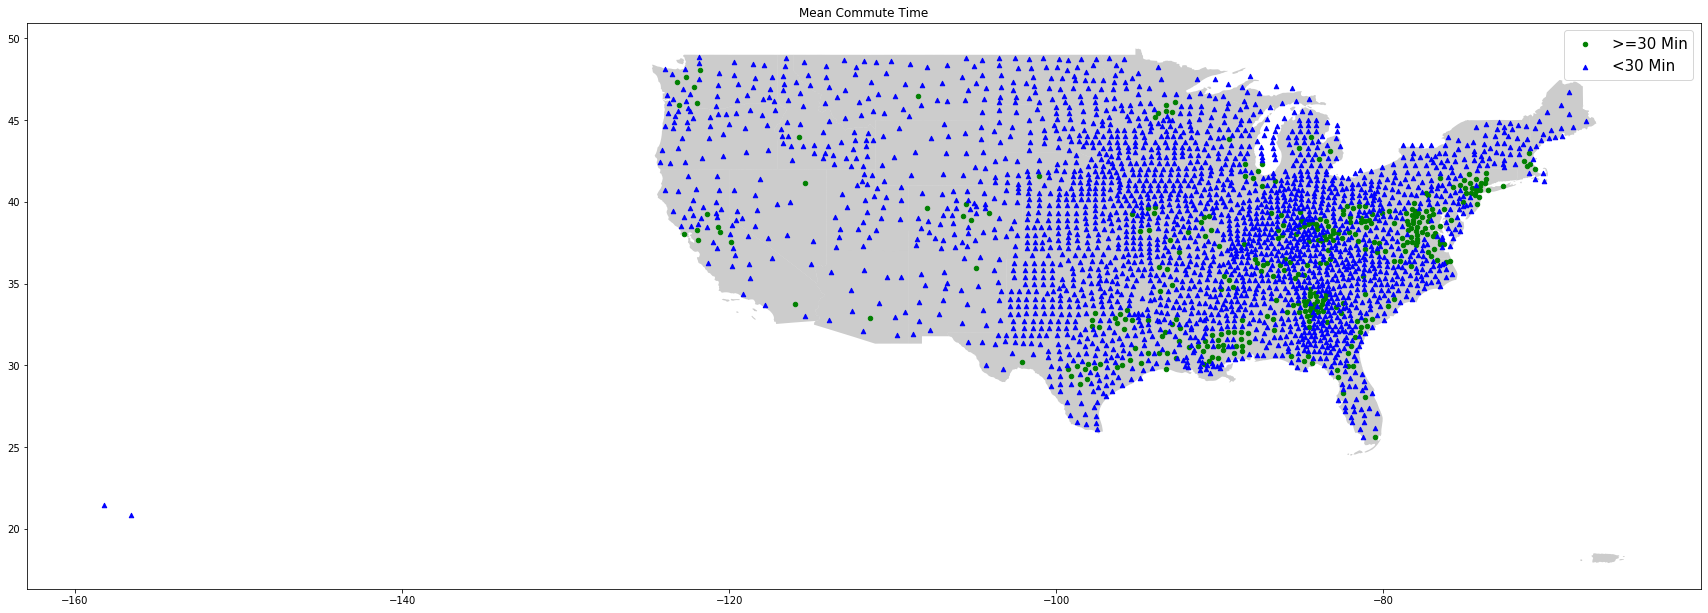

In [41]:
fig,ax = plt.subplots(figsize=(30, 20))
mainland.plot(ax = ax,alpha = .4,color = "grey")
geo_df[geo_df['MeanCommute']>=.30].plot(ax = ax, markersize = 20, color = "green",marker = "o",label = ">=30 Min")
geo_df[geo_df['MeanCommute']<.3].plot(ax = ax, markersize = 20, color = "blue",marker = "^",label = "<30 Min")
plt.title("Mean Commute Time")
plt.legend(prop = {'size':15})
plt.show()

### Map:

From the above map, we can see pockets of low and above income earners. For example, in the east coast we can see high amounts of above income earners and in the rural areas of Ohio, Kentucky, and Tenessee - a large number of low income earners. We will need to gather more coordinates data in Louisiana. We also will be investigating into other variables. 

###  Data Cleansing:

So far, we have performed data cleaning and removed rows that contained missing values. There were little missing values within the dataset but the attribute ChildPoverty had one missing. We converted several columns into percentages. The attributes race, poverty rate, type of work, commute and type of employment are all numbers that represent the percentage of the population, so we wanted to make sure that was reflected within the data. We also created dummy variables for the categorical values within the state column. Before we started our analysis, we removed the columns Longitude, Latitude, County, CountyID and Income. Income was removed because this is how we created our classifier Low_Income_Class (Low Income <=$48,500 & Above  >$48,500).

### **Machine Learning (ML)**

ML techniques will be listed further on, below. They will consist of multiple classification techniques and regression (for the other research questions). We will first work with default parameters, then perform parameter tuning for our main research questions. After that, we will perform regression techniques on the other research questions. 

## **Classification:**
Below are the default classification techniques that we have executed:

1.) Logisitic Regression

2.) K Nearest Neighbor

3.) Naive Bayes

4.) Decision Tree

5.) Random Forest

6.) Linear Discriminant Analysis

7.) Support Vector Machine

A summarization, and analysis will be provided at the end. 

In [42]:
df_classification = df_perc2
df_classification.head()

,State,County,Lat,Long,TotalPop,Men,Women,Hispanic,White,Black,...,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment,Low_Income_Class
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,Alabama,Autauga County,32.536382,-86.644490,55036,26899,28137,0.027,0.754,0.189,...,0.013,2.5,0.258,24112,0.741,0.202,0.056,0.001,0.052,Above
1003,Alabama,Baldwin County,30.659218,-87.746067,203360,99527,103833,0.044,0.831,0.095,...,0.011,5.6,0.270,89527,0.807,0.129,0.063,0.001,0.055,Above
1005,Alabama,Barbour County,31.870670,-85.405456,26201,13976,12225,0.042,0.457,0.478,...,0.017,1.3,0.234,8878,0.741,0.191,0.065,0.003,0.124,Low Income
1007,Alabama,Bibb County,33.015893,-87.127148,22580,12251,10329,0.024,0.746,0.220,...,0.017,1.5,0.300,8171,0.760,0.174,0.063,0.003,0.082,Low Income
1009,Alabama,Blount County,33.977448,-86.567246,57667,28490,29177,0.090,0.874,0.015,...,0.004,2.1,0.350,21380,0.839,0.119,0.040,0.001,0.049,Low Income


In [43]:
df_y = df_classification.Low_Income_Class
df_X = df_classification.drop(columns=['Low_Income_Class', 'County', 'Income','Lat','Long'])  #dropping class column, county and countyID, and income since we used this to create our classifier

In [44]:
df_X = pd.get_dummies(df_X)
df_X.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,55036,26899,28137,0.027,0.754,0.189,0.003,0.009,0.0,41016,...,0,0,0,0,0,0,0,0,0,0
1003,203360,99527,103833,0.044,0.831,0.095,0.008,0.007,0.0,155376,...,0,0,0,0,0,0,0,0,0,0
1005,26201,13976,12225,0.042,0.457,0.478,0.002,0.006,0.0,20269,...,0,0,0,0,0,0,0,0,0,0
1007,22580,12251,10329,0.024,0.746,0.220,0.004,0.000,0.0,17662,...,0,0,0,0,0,0,0,0,0,0
1009,57667,28490,29177,0.090,0.874,0.015,0.003,0.001,0.0,42513,...,0,0,0,0,0,0,0,0,0,0


In [45]:
#normalization
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler().fit(df_X)

df_X_norm = min_max_scaler.transform(df_X)
df_X_norm = pd.DataFrame(df_X_norm,columns = df_X.columns,index = df_X.index)

In [46]:
df_X_norm.isna().sum()

TotalPop               0
Men                    0
Women                  0
Hispanic               0
White                  0
                      ..
State_Virginia         0
State_Washington       0
State_West Virginia    0
State_Wisconsin        0
State_Wyoming          0
Length: 85, dtype: int64

In [47]:
child_pov_mean =  df_X_norm.ChildPoverty.mean()
df_X_norm.ChildPoverty.fillna(child_pov_mean,inplace = True)
df_X_norm.isna().sum().sum()

0

In [48]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, yTrain, yTest = train_test_split(df_X_norm,df_y, test_size=0.3, random_state=33) #updated test sample to 30%

## **Logistic Regression**

A linear classifer that has the goal of finding the best fitting model that will describe the relationship between income class, and our dataset. 

In [49]:
logclf_OG = LogisticRegression()          #model with default values 

In [50]:
logclf_OG.fit(Xtrain, yTrain)               #fitting our LR model to the training X and y 
logpred_train = logclf_OG.predict(Xtrain)   #predicting our train X with the model 
logpred_test_OG = logclf_OG.predict(Xtest)

In [51]:
print(logclf_OG.score(Xtrain,yTrain))

0.9006211180124224


In [52]:
print(logclf_OG.score(Xtest,yTest))

0.8788819875776398


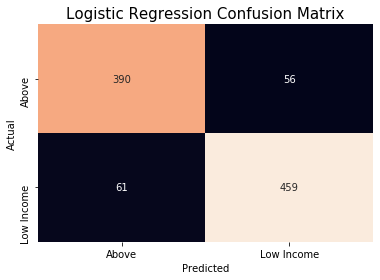

In [53]:
confusion_matrix = pd.crosstab(yTest, logpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Logistic Regression Confusion Matrix", fontsize = 15)
plt.show()

In [54]:
balanced_accuracy_score(yTest, logpred_test_OG)

0.8785658847878579

In [55]:
print(classification_report(yTest, logpred_test_OG))

              precision    recall  f1-score   support

       Above       0.86      0.87      0.87       446
  Low Income       0.89      0.88      0.89       520

    accuracy                           0.88       966
   macro avg       0.88      0.88      0.88       966
weighted avg       0.88      0.88      0.88       966



### Logistic Regression Parameter Optimization

In [56]:
C_list = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 10, 50, 100, 200, 500, 1000, 2000, 5000, 10000]
accuracy_train = []
accuracy_test = []
for C in C_list:
    clf = LogisticRegression(C=C)       #updating the C value with every iteration
    clf.fit(Xtrain, yTrain) #fitting our model to the training X and y 
    
    pred_train = clf.predict(Xtrain) #predicting our train X with the model 
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = pred_train) #calculating the training accuracy based on the predicted values
    accuracy_train.append(train_accuracyscore)   #appending accuracy score to our training list 
    
    pred_test = clf.predict(Xtest)  
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = pred_test)
    accuracy_test.append(test_accuracyscore) #appending accuracy score to our test list 

In [57]:
accuracy_train 

[0.5270629991126885,
 0.5297249334516415,
 0.5749778172138421,
 0.8043478260869565,
 0.8194321206743567,
 0.8451641526175687,
 0.8642413487133984,
 0.8913043478260869,
 0.9006211180124224,
 0.9037267080745341,
 0.9174800354924578,
 0.919698314108252,
 0.9201419698314108,
 0.9188110026619344,
 0.9192546583850931,
 0.9201419698314108,
 0.9205856255545697,
 0.9214729370008873,
 0.922360248447205]

In [58]:
accuracy_test

[0.5383022774327122,
 0.546583850931677,
 0.5869565217391305,
 0.7919254658385093,
 0.8126293995859213,
 0.8364389233954451,
 0.8467908902691511,
 0.8695652173913043,
 0.8788819875776398,
 0.8809523809523809,
 0.8902691511387164,
 0.8985507246376812,
 0.8975155279503105,
 0.8964803312629399,
 0.8944099378881988,
 0.8944099378881988,
 0.8964803312629399,
 0.8975155279503105,
 0.9006211180124224]

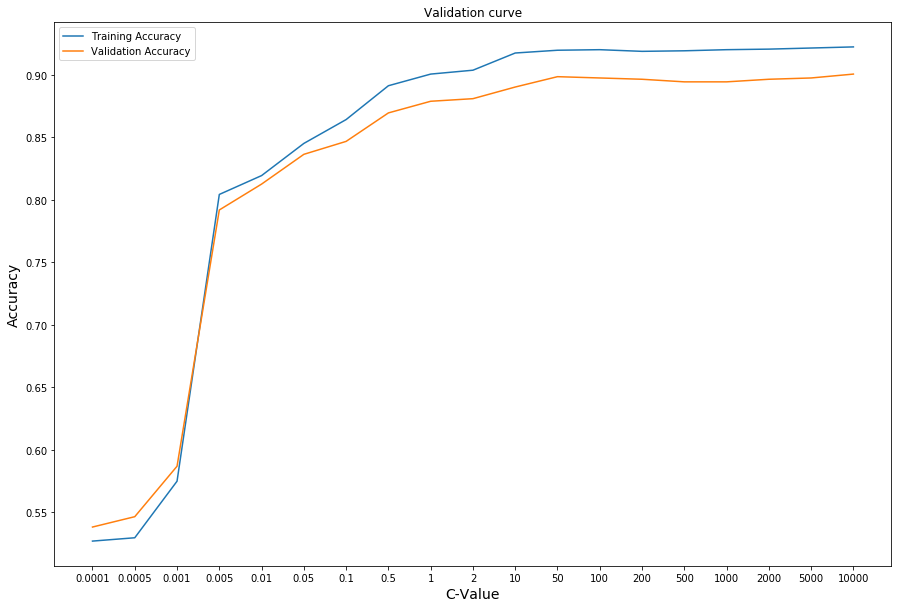

In [59]:
listme = ['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1', '0.5', '1', '2', '10', '50', '100', '200', '500', '1000', '2000', '5000', '10000']
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(listme, accuracy_train, label = 'Training Accuracy') #plotting our C-values with their respective training  accuracies 
plt.plot(listme, accuracy_test, label = 'Validation Accuracy') #plotting our C-values with their respective testing  accuracies 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('C-Value', fontsize = 14)
plt.title('Validation curve')
plt.legend()

- Accuracies 
- 0.9006 / 0.8788 --> default model values 
- 0.9197 / 0.8985 --> best accuracy with C=50 

### Running best Logistic Regression Model 

In [60]:
logclf_best = LogisticRegression(C=50)   

In [61]:
logclf_best.fit(Xtrain, yTrain)               #fitting our LR model to the training X and y 
logpred_train = logclf_best.predict(Xtrain)   #predicting our train X with the model 
logpred_test_best = logclf_best.predict(Xtest)

In [62]:
print(logclf_best.score(Xtrain,yTrain))
print(logclf_best.score(Xtest,yTest))

0.919698314108252
0.8985507246376812


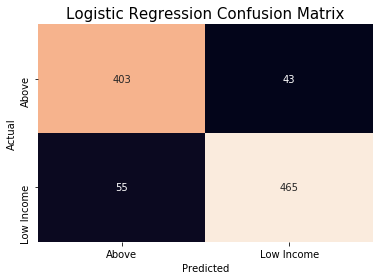

In [63]:
confusion_matrix = pd.crosstab(yTest, logpred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Logistic Regression Confusion Matrix", fontsize = 15)
plt.show()

In [64]:
print(balanced_accuracy_score(yTest, logpred_test_best))
print(classification_report(yTest, logpred_test_best))

0.8989091065884789
              precision    recall  f1-score   support

       Above       0.88      0.90      0.89       446
  Low Income       0.92      0.89      0.90       520

    accuracy                           0.90       966
   macro avg       0.90      0.90      0.90       966
weighted avg       0.90      0.90      0.90       966



## **KNN Classifier**

A supervised classifier that measures the proximity of data points. Dependent on the proximity, KNN takes labbelled points in order to look other points to determine them neighbors. 

In [65]:
knnclf_OG = neighbors.KNeighborsClassifier() #default model values 

In [66]:
knnclf_OG.fit(Xtrain, yTrain)#creating the KNN classifier and fitting the model with our training data - X and y
knnpred_train = knnclf_OG.predict(Xtrain) #using train X data to predict our training class values within our KNN model
knnpred_test_OG = knnclf_OG.predict(Xtest)

In [67]:
print(knnclf_OG.score(Xtrain,yTrain))

0.8895297249334516


In [68]:
knn_testacc = knnclf_OG.score(Xtest,yTest)
print(knn_testacc)

0.8385093167701864


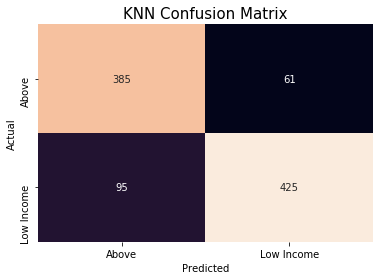

In [69]:
confusion_matrix = pd.crosstab(yTest, knnpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #using crosstab to help us crate the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("KNN Confusion Matrix", fontsize = 15)
plt.show()

In [70]:
print(classification_report(yTest, knnpred_test_OG))

              precision    recall  f1-score   support

       Above       0.80      0.86      0.83       446
  Low Income       0.87      0.82      0.84       520

    accuracy                           0.84       966
   macro avg       0.84      0.84      0.84       966
weighted avg       0.84      0.84      0.84       966



### KNN Parameter Optimization

In [71]:
K_list = [1,3,5,7,9,15,19,25,29,35,39,45,49,99]
accuracy_train = []
accuracy_test = []
for K in K_list:
    clf = neighbors.KNeighborsClassifier(n_neighbors=K)  #using KNN classfier to categorize our data. we are using a different number of neighbors each time 
    clf.fit(Xtrain, yTrain)
    
    knnpreds_train = clf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = knnpreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    knnpreds_test = clf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = knnpreds_test)
    accuracy_test.append(test_accuracyscore)

In [72]:
accuracy_train 

[1.0,
 0.9112688553682342,
 0.8895297249334516,
 0.8762200532386868,
 0.8682342502218279,
 0.8491570541259982,
 0.8367346938775511,
 0.821206743566992,
 0.8052351375332741,
 0.792812777284827,
 0.7710736468500443,
 0.764418811002662,
 0.7595385980479148,
 0.7941437444543035]

In [73]:
accuracy_test

[0.8126293995859213,
 0.8436853002070394,
 0.8385093167701864,
 0.8281573498964804,
 0.8322981366459627,
 0.8157349896480331,
 0.8126293995859213,
 0.7960662525879917,
 0.7981366459627329,
 0.7815734989648033,
 0.7701863354037267,
 0.7525879917184265,
 0.7556935817805382,
 0.7950310559006211]

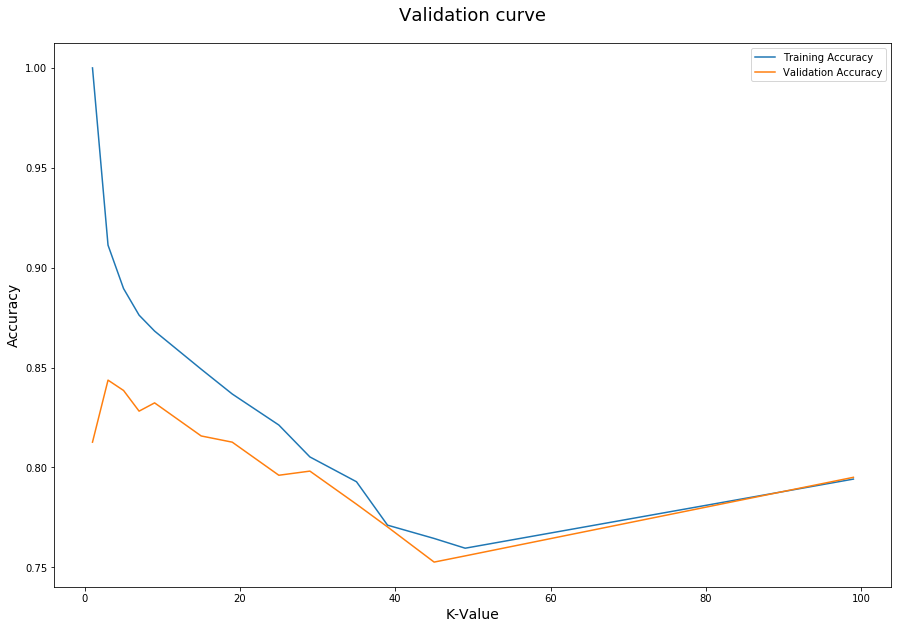

In [74]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(K_list, accuracy_train, label = 'Training Accuracy') #plotting our k values with the training accuracies 
plt.plot(K_list, accuracy_test, label = 'Validation Accuracy') #plotting our k values with the testing accuracies 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('K-Value', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

### Bagging Ensemble Learners 
Slight overfitting so trying bagging but does not seem to help too much. 

In [75]:
bagging = BaggingClassifier(neighbors.KNeighborsClassifier(n_neighbors=9))  #helps to create stronger learners based on random samples 
bagging.fit(Xtrain, yTrain) #fitting to our normalized training data

BaggingClassifier(base_estimator=KNeighborsClassifier(algorithm='auto',
                                                      leaf_size=30,
                                                      metric='minkowski',
                                                      metric_params=None,
                                                      n_jobs=None,
                                                      n_neighbors=9, p=2,
                                                      weights='uniform'),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [76]:
bagging.score(Xtrain, yTrain) #accuracy score

0.8748890860692103

In [77]:
bagging.score(Xtest, yTest)  #accuracy score

0.8312629399585921

#### Accuraces on training and testing
- 0.8895 / 0.8385 default KNN
- 0.8682 / 0.8322 K=9 
- 0.8708 / 0.83022 bagging & with K=9

### Running best KNN Model 

In [78]:
knnclf_best = neighbors.KNeighborsClassifier(n_neighbors=9)  #K=9, not using bagging 

In [79]:
knnclf_best.fit(Xtrain, yTrain)            #creating the KNN classifier and fitting the model with our training data - X and y
knnpred_train = knnclf_best.predict(Xtrain) #using train X data to predict our training class values within our KNN model
knnpred_test_best = knnclf_best.predict(Xtest)

In [80]:
print(knnclf_best.score(Xtrain,yTrain))
print(knnclf_best.score(Xtest,yTest))

0.8682342502218279
0.8322981366459627


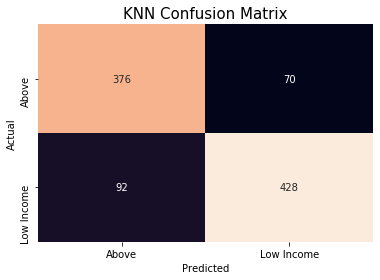

In [81]:
confusion_matrix = pd.crosstab(yTest, knnpred_test_best, rownames=['Actual'], colnames=['Predicted']) #using crosstab to help us crate the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("KNN Confusion Matrix", fontsize = 15)
plt.show()

In [82]:
print(balanced_accuracy_score(yTest, knnpred_test_best))
print(classification_report(yTest, knnpred_test_best))

0.8330631252155916
              precision    recall  f1-score   support

       Above       0.80      0.84      0.82       446
  Low Income       0.86      0.82      0.84       520

    accuracy                           0.83       966
   macro avg       0.83      0.83      0.83       966
weighted avg       0.83      0.83      0.83       966



## **Naive Bayes**

A linear classifier that assumes independence among features. In other words, each feature contributes the classfication of the dependent variable on its own.

In [83]:
nbclf_OG = naive_bayes.GaussianNB()    #initating our naive bayes classifier 

In [84]:
nbclf_OG.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf_OG.predict(Xtrain)  #predicting our y training data cases 
nbpred_test_OG =  nbclf_OG.predict(Xtest)

In [85]:
nbclf_OG.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf_OG.predict(Xtrain)  #predicting our y training data cases 
nbpred_test_OG =  nbclf_OG.predict(Xtest)

In [86]:
print(nbclf_OG.score(Xtrain,yTrain))

0.6561668145519077


In [87]:
nb_testacc = nbclf_OG.score(Xtest,yTest)
print(nb_testacc)

0.6801242236024845


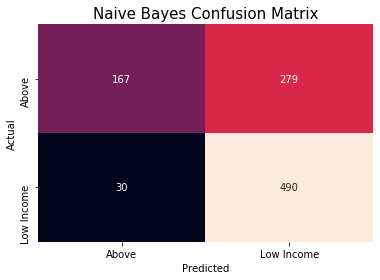

In [88]:
confusion_matrix = pd.crosstab(yTest, nbpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Naive Bayes Confusion Matrix", fontsize = 15)
plt.show()

In [89]:
print(classification_report(yTest, nbpred_test_OG))

              precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0.68      0.65       966



### Naive Bayes Optimization

In [90]:
bagging = BaggingClassifier(naive_bayes.GaussianNB())
bagging.fit(Xtrain, yTrain) #fitting to our normalized training data

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [91]:
bagging.score(Xtrain, yTrain) #accuracy score

0.6601597160603372

In [92]:
bagging.score(Xtest, yTest)  #accuracy score

0.6863354037267081

- training / testing accuracy
- 0.6561 / 0.6801
- 0.6530 / 0.6780 with bagging 

### Running best Naive Bayes Model 

In [93]:
nbclf_best = naive_bayes.GaussianNB()    #initating our naive bayes classifier 

In [94]:
nbclf_best.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf_best.predict(Xtrain)  #predicting our y training data cases 
nbpred_test =  nbclf_best.predict(Xtest)

In [95]:
nbclf_best.fit(Xtrain, yTrain) #creating the naive bayes classifier and fitting the model with our training data - X and
nbpred_train = nbclf_best.predict(Xtrain)  #predicting our y training data cases 
nbpred_test_best =  nbclf_best.predict(Xtest)

In [96]:
print(nbclf_best.score(Xtrain,yTrain))

0.6561668145519077


In [97]:
nb_testacc = nbclf_best.score(Xtest,yTest)
print(nb_testacc)

0.6801242236024845


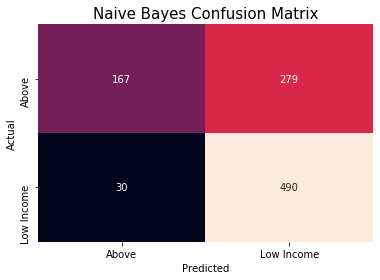

In [98]:
confusion_matrix = pd.crosstab(yTest, nbpred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Naive Bayes Confusion Matrix", fontsize = 15)
plt.show()

In [99]:
print(balanced_accuracy_score(yTest, nbpred_test_best))
print(classification_report(yTest, nbpred_test_best))

0.6583735770955502
              precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0.68      0.65       966



## **Decision Tree Classifier**

Build a model in form of a tree. The top of the tree is the root, and is also the best predictor. What come after are the branches and leaves, which split based on information gain or entropy (depending on specifications).

In [100]:
treeclf_OG = DecisionTreeClassifier() #initating our decision tree classifier 

In [101]:
treeclf_OG.fit(Xtrain, yTrain) #creating the DT classifier and fitting the model with our training data - X and y
treepred_train = treeclf_OG.predict(Xtrain)
treepred_test_OG = treeclf_OG.predict(Xtest)

In [102]:
print(treeclf_OG.score(Xtrain,yTrain))

1.0


In [103]:
tree_testacc = treeclf_OG.score(Xtest,yTest)
print(tree_testacc)

0.8571428571428571


In [104]:
print(classification_report(yTest, treepred_test_OG))

              precision    recall  f1-score   support

       Above       0.84      0.85      0.85       446
  Low Income       0.87      0.86      0.87       520

    accuracy                           0.86       966
   macro avg       0.86      0.86      0.86       966
weighted avg       0.86      0.86      0.86       966



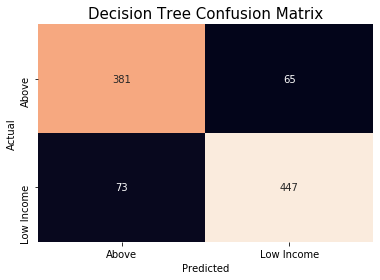

In [105]:
confusion_matrix = pd.crosstab(yTest, treepred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Decision Tree Confusion Matrix", fontsize = 15)
plt.show()

#plotting the predicted classes verses

In [106]:
tree = export_graphviz(treeclf_OG, out_file=None, feature_names=Xtrain.columns, class_names=['Above','Low Income'])
graph = Source(tree)

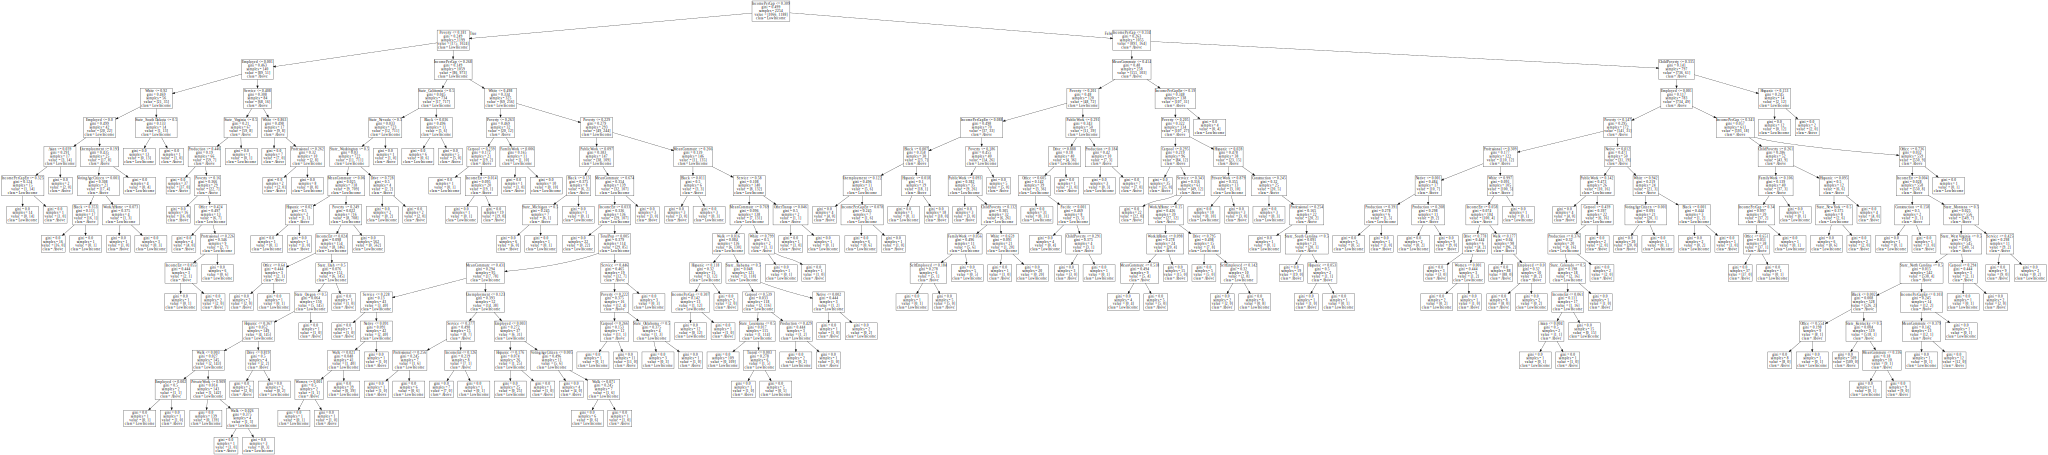

In [107]:
display(SVG(graph.pipe(format='svg')))

### Decision Tree Optimization 
#### min_samples_split

In [108]:
parameters = {'min_samples_split' : [50, 75, 100, 150, 200, 250, 300, 350]}
grid_cv = GridSearchCV(estimator = treeclf_OG, param_grid=parameters, cv=5)

In [109]:
grid_cv.fit(Xtrain, yTrain) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'min_samples_split': [50, 75, 100, 150, 200, 250, 300,
                                               350]},
  

In [110]:
grid_cv.cv_results_

{'mean_fit_time': array([0.03811398, 0.03550448, 0.03251553, 0.03450999, 0.02732306,
        0.02991781, 0.03009834, 0.0289227 ]),
 'std_fit_time': array([0.00458653, 0.00299769, 0.00386793, 0.01297023, 0.00258834,
        0.0033949 , 0.00318666, 0.00438402]),
 'mean_score_time': array([0.00177031, 0.00160022, 0.00159349, 0.00119543, 0.0015955 ,
        0.00139661, 0.00241508, 0.00159559]),
 'std_score_time': array([0.00038586, 0.00048366, 0.00048633, 0.00039984, 0.0004891 ,
        0.00048846, 0.00183835, 0.0004885 ]),
 'param_min_samples_split': masked_array(data=[50, 75, 100, 150, 200, 250, 300, 350],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'min_samples_split': 50},
  {'min_samples_split': 75},
  {'min_samples_split': 100},
  {'min_samples_split': 150},
  {'min_samples_split': 200},
  {'min_samples_split': 250},
  {'min_samples_split': 300},
  {'min_samples_split': 350}],
 'split0_t

#### max_depth

In [111]:
parameters = {'max_depth' : [3,5,7,10,15,20,30], 'min_samples_split':[250]} 
grid_cv = GridSearchCV(estimator = treeclf_OG, param_grid=parameters, cv=5)

In [112]:
grid_cv.fit(Xtrain, yTrain) 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [3, 5, 7, 10, 15, 20, 30],
                         'min_samples_split': [250]},
             pre_

In [113]:
grid_cv.cv_results_

{'mean_fit_time': array([0.01297045, 0.02092867, 0.02572103, 0.02752633, 0.02713056,
        0.02613192, 0.02854772]),
 'std_fit_time': array([8.09921634e-06, 6.24396335e-04, 4.61531405e-03, 2.57317458e-03,
        2.32056110e-03, 2.38765203e-03, 2.06181317e-03]),
 'mean_score_time': array([0.00099521, 0.00121155, 0.00200858, 0.0015934 , 0.00139503,
        0.00138321, 0.00118623]),
 'std_score_time': array([2.43793927e-06, 3.96385256e-04, 1.09222788e-03, 4.88392097e-04,
        4.87605933e-04, 4.73707385e-04, 3.76427122e-04]),
 'param_max_depth': masked_array(data=[3, 5, 7, 10, 15, 20, 30],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[250, 250, 250, 250, 250, 250, 250],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 3, 'min_samples_split': 250},
  {'max_depth': 5,

#### training / testing accuracy
- 1.0 / 0.8571 - default model
- 0.8833 / 0.86113 min_samples_split=250 
- 0.8869 / 0.8682 max_depth=3 & min_samples_split=250 

#### Running the Best Tree Model

In [114]:
treeBest = DecisionTreeClassifier(min_samples_split=250, max_depth=3) #initating our decision tree classifier  
treeclf_best = treeBest.fit(Xtrain, yTrain) #creating the DT classifier and fitting the model with our training data - X and y

In [115]:
treepred_train = treeclf_best.predict(Xtrain) #predicting our y TRAINING data cases & storing the predicted vals in treepred_train
treepred_test_best = treeclf_best.predict(Xtest)  #predicting our y TESTING data cases & storing the predicted vals in treepred_test

In [116]:
#predicting accuracy scores using the metrics package from sklearn
print(metrics.accuracy_score(y_true = yTrain, y_pred = treepred_train))
print(metrics.accuracy_score(y_true = yTest, y_pred = treepred_test_best))

0.8815439219165927
0.8385093167701864


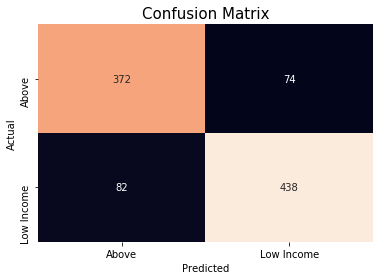

In [117]:
confusion_matrix = pd.crosstab(yTest, treepred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating the confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Confusion Matrix", fontsize = 15)
plt.show()

In [118]:
print(metrics.classification_report(yTest, treepred_test_best))

              precision    recall  f1-score   support

       Above       0.82      0.83      0.83       446
  Low Income       0.86      0.84      0.85       520

    accuracy                           0.84       966
   macro avg       0.84      0.84      0.84       966
weighted avg       0.84      0.84      0.84       966



In [119]:
balanced_accuracy_score(yTest, treepred_test_best)

0.8381942048982407

## **Random Forest Classifier**

An ensemble learner that operates through using an usually large amount of decision trees. The resulting class is the most freqent one predicted. 

In [120]:
rfclf_OG = RandomForestClassifier()

In [121]:
rfclf_OG.fit(Xtrain, yTrain) #creating the RF classifier and fitting the model with our training data - X and y
rfpred_train = rfclf_OG.predict(Xtrain)
rfpred_test_OG = rfclf_OG.predict(Xtest)

In [122]:
print(rfclf_OG.score(Xtrain,yTrain))

0.9920141969831411


In [123]:
rf_testacc = rfclf_OG.score(Xtest,yTest)
print(rf_testacc)

0.8737060041407867


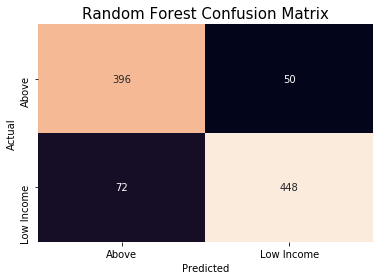

In [124]:
confusion_matrix = pd.crosstab(yTest, rfpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Random Forest Confusion Matrix", fontsize = 15)
plt.show()

#plotting the predicted classes verses the actual test classes into a matrix

In [125]:
print(classification_report(yTest, rfpred_test_OG))

              precision    recall  f1-score   support

       Above       0.85      0.89      0.87       446
  Low Income       0.90      0.86      0.88       520

    accuracy                           0.87       966
   macro avg       0.87      0.87      0.87       966
weighted avg       0.87      0.87      0.87       966



### Optimizing RF
#### min_samples_split

In [126]:
mylist = [10, 25, 50, 100, 150, 200, 250, 300, 400]
accuracy_train = []
accuracy_test = []
for X in mylist:
    rfclf = RandomForestClassifier(min_samples_split=X)  
    rfclf.fit(Xtrain, yTrain)
    
    rfpreds_train = rfclf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = rfpreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    rfpreds_test = rfclf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = rfpreds_test)
    accuracy_test.append(test_accuracyscore)

In [127]:
accuracy_train 

[0.9729370008873115,
 0.9476486246672582,
 0.9201419698314108,
 0.8935226264418811,
 0.8828748890860693,
 0.8828748890860693,
 0.8779946761313221,
 0.867790594498669,
 0.8762200532386868]

In [128]:
accuracy_test

[0.8830227743271222,
 0.8819875776397516,
 0.8861283643892339,
 0.8716356107660456,
 0.865424430641822,
 0.8633540372670807,
 0.855072463768116,
 0.8509316770186336,
 0.855072463768116]

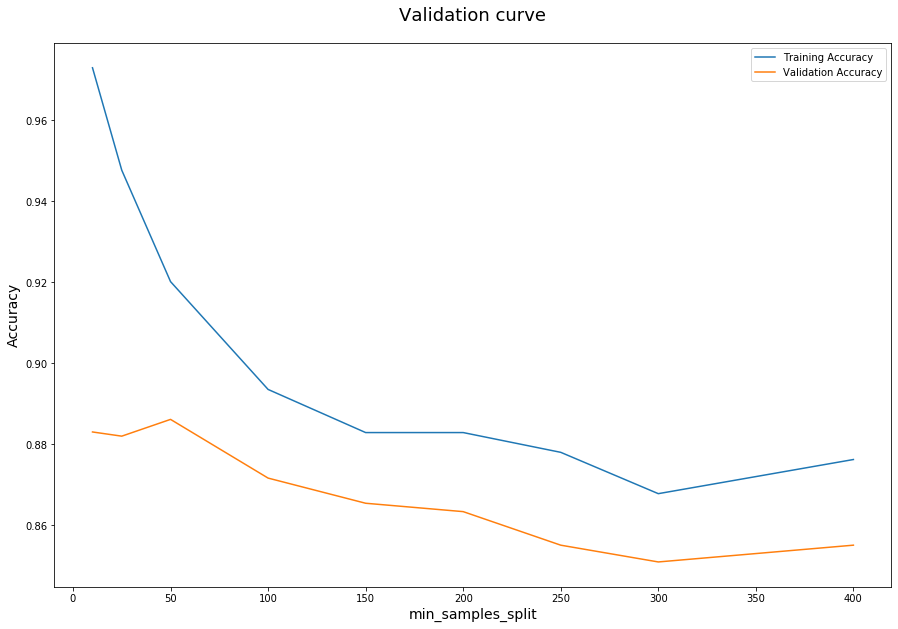

In [129]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy')  
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('min_samples_split', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

#### max_depth

In [130]:
mylist = [3,4,5,7,8,9,10,15,20]
accuracy_train = []
accuracy_test = []
for X in mylist:
    rfclf = RandomForestClassifier(max_depth=X, min_samples_split=150)  #using RF classfier to categorize our data. we are using a different number of neighbors each time 
    rfclf.fit(Xtrain, yTrain)
    
    rfpreds_train = rfclf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = rfpreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    rfpreds_test = rfclf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = rfpreds_test)
    accuracy_test.append(test_accuracyscore)

In [131]:
accuracy_train 

[0.8615794143744454,
 0.8899733806566105,
 0.8842058562555457,
 0.8846495119787046,
 0.8855368234250222,
 0.8828748890860693,
 0.8881987577639752,
 0.8868677905944987,
 0.8864241348713399]

In [132]:
accuracy_test

[0.8457556935817805,
 0.8674948240165632,
 0.865424430641822,
 0.860248447204969,
 0.865424430641822,
 0.8540372670807453,
 0.8695652173913043,
 0.8695652173913043,
 0.8664596273291926]

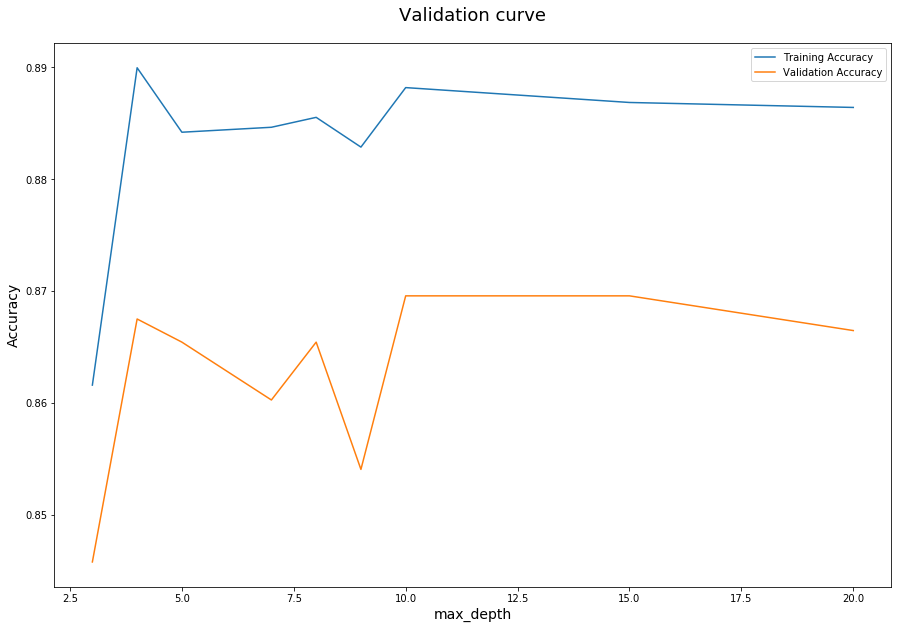

In [133]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') #plotting our k values with the training accuracies 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy') #plotting our k values with the testing accuracies 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('max_depth', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

#### n_estimators

In [134]:
mylist = [25, 50, 100, 150, 200, 250, 300, 400]
accuracy_train = []
accuracy_test = []
for X in mylist:
    rfclf = RandomForestClassifier(n_estimators=X,min_samples_split=150,max_depth=7)  #using RF classfier to categorize our data. we are using a different number of neighbors each time 
    rfclf.fit(Xtrain, yTrain)
    
    rfpreds_train = rfclf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = rfpreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    rfpreds_test = rfclf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = rfpreds_test)
    accuracy_test.append(test_accuracyscore)

In [135]:
accuracy_train 

[0.8855368234250222,
 0.888642413487134,
 0.8939662821650399,
 0.8921916592724046,
 0.8913043478260869,
 0.8930789707187222,
 0.8926353149955635,
 0.8899733806566105]

In [136]:
accuracy_test

[0.8716356107660456,
 0.8788819875776398,
 0.8757763975155279,
 0.8768115942028986,
 0.8799171842650103,
 0.8819875776397516,
 0.8799171842650103,
 0.8830227743271222]

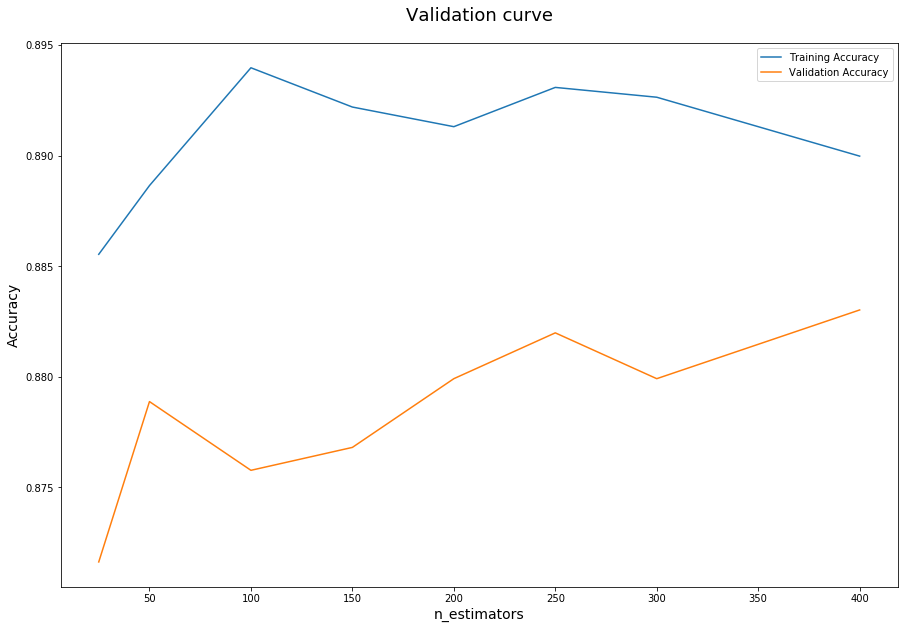

In [137]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy') 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('n_estimators', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

### Running Best RF Model

Best Accuracy was found with the following parameters:
- min_samples_split=150
- max_depth=7
- n_estimators=50

In [138]:
rfclf_best = RandomForestClassifier(min_samples_split=150, max_depth=7, n_estimators=50)
rfclf_best.fit(Xtrain, yTrain)
rfpred_train = rfclf_best.predict(Xtrain)
rfpred_test_best = rfclf_best.predict(Xtest)

In [139]:
print(rfclf.score(Xtrain,yTrain))
print(rfclf.score(Xtest,yTest))
print(balanced_accuracy_score(yTest, rfpred_test_best))

0.8899733806566105
0.8830227743271222
0.8742411176267678


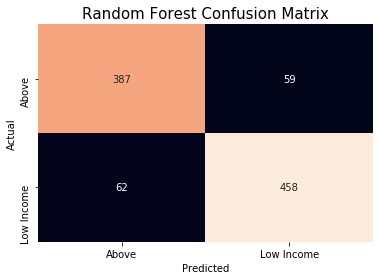

In [140]:
confusion_matrix = pd.crosstab(yTest, rfpred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Random Forest Confusion Matrix", fontsize = 15)
plt.show()

In [141]:
print(classification_report(yTest, rfpred_test_best))

              precision    recall  f1-score   support

       Above       0.86      0.87      0.86       446
  Low Income       0.89      0.88      0.88       520

    accuracy                           0.87       966
   macro avg       0.87      0.87      0.87       966
weighted avg       0.87      0.87      0.87       966



## **Linear Discriminant Analysis**

A supervised learner that makes a prediciton based on the probabiity of inputs belong to each class.

In [142]:
ldclf_OG = LinearDiscriminantAnalysis()

In [143]:
ldclf_OG.fit(Xtrain,yTrain)
ldclfpred_train = ldclf_OG.predict(Xtrain)
ldclfpred_test_OG = ldclf_OG.predict(Xtest)

In [144]:
print(ldclf_OG.score(Xtrain,yTrain))

0.888642413487134


In [145]:
lda_testacc = ldclf_OG.score(Xtest,yTest)
print(lda_testacc)

0.8726708074534162


In [146]:
print(classification_report(yTest, ldclfpred_test_OG))

              precision    recall  f1-score   support

       Above       0.85      0.87      0.86       446
  Low Income       0.89      0.87      0.88       520

    accuracy                           0.87       966
   macro avg       0.87      0.87      0.87       966
weighted avg       0.87      0.87      0.87       966



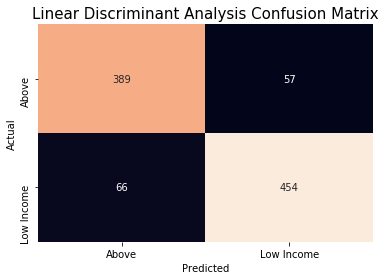

In [147]:
confusion_matrix = pd.crosstab(yTest, ldclfpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Linear Discriminant Analysis Confusion Matrix", fontsize = 15)
plt.show()

### Optimizing LDA Model

In [148]:
mylist = [1,2,3,4,5]
accuracy_train = []
accuracy_test = []
for X in mylist:
    clf = LinearDiscriminantAnalysis(n_components=X)  
    clf.fit(Xtrain, yTrain)
    
    ldapreds_train = clf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = ldapreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    ldapreds_test = clf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = ldapreds_test)
    accuracy_test.append(test_accuracyscore)

In [149]:
accuracy_train 

[0.888642413487134,
 0.888642413487134,
 0.888642413487134,
 0.888642413487134,
 0.888642413487134]

In [150]:
accuracy_test

[0.8726708074534162,
 0.8726708074534162,
 0.8726708074534162,
 0.8726708074534162,
 0.8726708074534162]

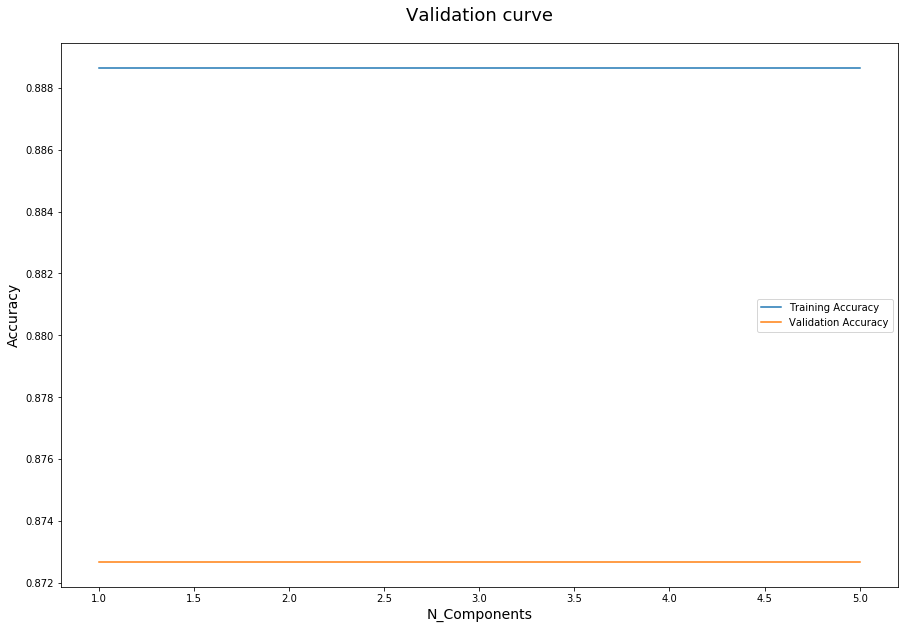

In [151]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy') 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('N_Components', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

### **Linear Discriminant Analysis Best Model**

In [152]:
ldclf_best = LinearDiscriminantAnalysis()

In [153]:
ldclf_best.fit(Xtrain,yTrain)
ldclfpred_train = ldclf_best.predict(Xtrain)
ldclfpred_test_best = ldclf_best.predict(Xtest)

In [154]:
print(ldclf_best.score(Xtrain,yTrain))

0.888642413487134


In [155]:
lda_testacc = ldclf_best.score(Xtest,yTest)
print(lda_testacc)

0.8726708074534162


In [156]:
print(classification_report(yTest, ldclfpred_test_best))

              precision    recall  f1-score   support

       Above       0.85      0.87      0.86       446
  Low Income       0.89      0.87      0.88       520

    accuracy                           0.87       966
   macro avg       0.87      0.87      0.87       966
weighted avg       0.87      0.87      0.87       966



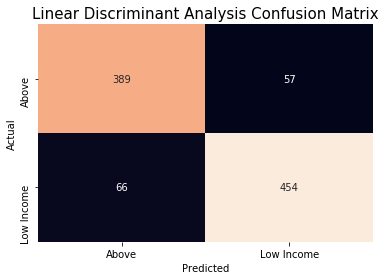

In [157]:
confusion_matrix = pd.crosstab(yTest, ldclfpred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Linear Discriminant Analysis Confusion Matrix", fontsize = 15)
plt.show()

In [158]:
balanced_accuracy_score(yTest, ldclfpred_test_best)

0.8726371162469817

## **Support Vector Machine**

A supervised learner that classifies data, based on finding an optimal hyperplane in the data. 

In [159]:
svmclf_OG = svm.SVC(random_state = 33)

In [160]:
svmclf_OG.fit(Xtrain,yTrain)
svmclfpred_train_OG = svmclf_OG.predict(Xtrain)
svmclfpred_test_OG = svmclf_OG.predict(Xtest)

In [161]:
print(svmclf_OG.score(Xtrain,yTrain))

0.8371783496007098


In [162]:
print(svmclf_OG.score(Xtest,yTest))

0.8240165631469979


In [163]:
print(classification_report(yTest, svmclfpred_test_OG))

              precision    recall  f1-score   support

       Above       0.79      0.84      0.81       446
  Low Income       0.85      0.81      0.83       520

    accuracy                           0.82       966
   macro avg       0.82      0.83      0.82       966
weighted avg       0.83      0.82      0.82       966



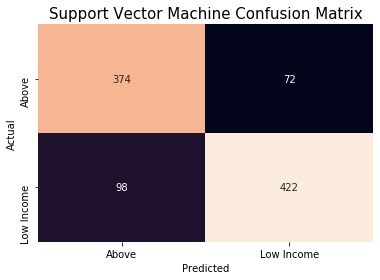

In [164]:
confusion_matrix = pd.crosstab(yTest, svmclfpred_test_OG, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Support Vector Machine Confusion Matrix", fontsize = 15)
plt.show()

### Optimizing SVC Model
#### C

In [165]:
mylist = [1, 10, 50, 100, 200, 300, 500, 1000]
accuracy_train = []
accuracy_test = []
for X in mylist:
    clf = svm.SVC(C=X)  #using SVC classfier to categorize our data. 
    clf.fit(Xtrain, yTrain)
    
    svmpreds_train = clf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = svmclfpred_train_OG) 
    accuracy_train.append(train_accuracyscore)
    
    svmpreds_test = clf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = svmclfpred_test_OG)
    accuracy_test.append(test_accuracyscore)

In [166]:
accuracy_train 

[0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098,
 0.8371783496007098]

In [167]:
accuracy_test

[0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979,
 0.8240165631469979]

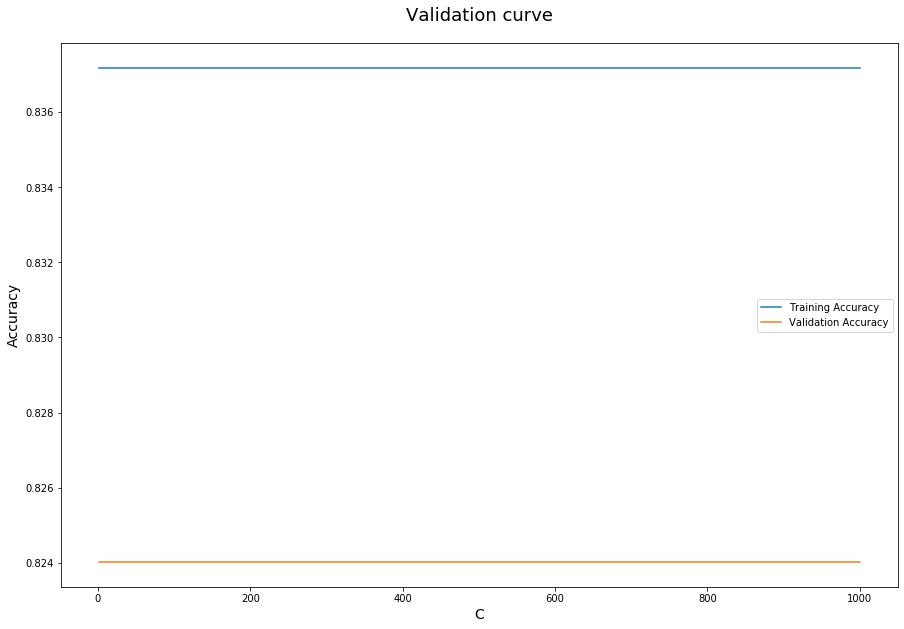

In [168]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy') 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('C', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

#### gamma

In [169]:
mylist = [.001, .01, .1, 1]
accuracy_train = []
accuracy_test = []
for X in mylist:
    clf = svm.SVC(gamma=X, C=200)  
    clf.fit(Xtrain, yTrain)
    
    svmpreds_train = clf.predict(Xtrain)
    train_accuracyscore = metrics.accuracy_score(y_true = yTrain, y_pred = svmpreds_train) 
    accuracy_train.append(train_accuracyscore)
    
    svmpreds_test = clf.predict(Xtest)
    test_accuracyscore = metrics.accuracy_score(y_true = yTest, y_pred = svmpreds_test)
    accuracy_test.append(test_accuracyscore)

In [170]:
accuracy_train 

[0.8992901508429458,
 0.9183673469387755,
 0.9485359361135759,
 0.9977817213842058]

In [171]:
accuracy_test

[0.8747412008281573,
 0.8881987577639752,
 0.8995859213250518,
 0.8685300207039337]

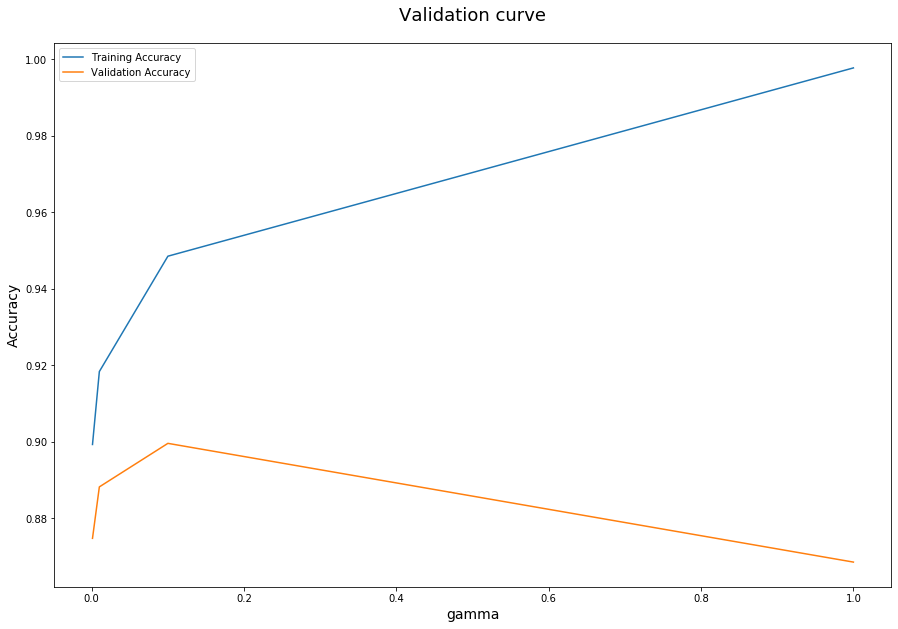

In [172]:
plt.figure(figsize=(15,10))   #getting plot size 
plt.plot(mylist, accuracy_train, label = 'Training Accuracy') 
plt.plot(mylist, accuracy_test, label = 'Validation Accuracy') 
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('gamma', fontsize = 14)
plt.title('Validation curve', fontsize = 18, y = 1.03)
plt.legend()

#### training / testing accuracy
- 0.8371 / 0.8240 - default accuracy
- 0.9188 / 0.8881 - C=200
- 0.9183 / 0.8881 - C=200 & gamma=.01

### Running Best Model

In [173]:
svmclf_best = svm.SVC(C=200)

In [174]:
svmclf_best.fit(Xtrain,yTrain)
svmclfpred_train_best = svmclf_best.predict(Xtrain)
svmclfpred_test_best = svmclf_best.predict(Xtest)

In [175]:
print(svmclf_best.score(Xtrain,yTrain))
print(svmclf_best.score(Xtest,yTest))
print(balanced_accuracy_score(yTest, svmclfpred_test_best))

0.9188110026619344
0.8881987577639752
0.8888151086581579


In [176]:
print(classification_report(yTest, svmclfpred_test_best))

              precision    recall  f1-score   support

       Above       0.87      0.90      0.88       446
  Low Income       0.91      0.88      0.89       520

    accuracy                           0.89       966
   macro avg       0.89      0.89      0.89       966
weighted avg       0.89      0.89      0.89       966



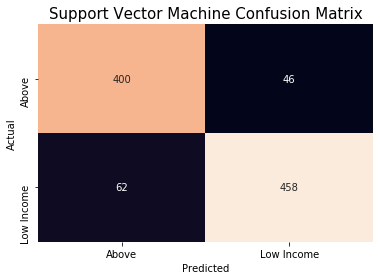

In [177]:
confusion_matrix = pd.crosstab(yTest, svmclfpred_test_best, rownames=['Actual'], colnames=['Predicted']) #creating confusion matrix 
sns.heatmap(confusion_matrix, annot=True, square=False, fmt='', cbar=False)
plt.title("Support Vector Machine Confusion Matrix", fontsize = 15)
plt.show()

**Experiment results [10]: Show the ML experiments that you've run, the outcomes, and any error analysis that you've done.**

Directly Below is the summary of the classification results. Further on (near the bottom) will be the summary of the regression results. 

## **Summarizing Classification Results**

In [178]:
from sklearn import neighbors, naive_bayes, feature_selection      
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [179]:
logclf = LogisticRegression()#model with default values 
logclf.fit(Xtrain,yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [180]:
knnclf = neighbors.KNeighborsClassifier() #default model values 
knnclf.fit(Xtrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [181]:
nbclf = naive_bayes.GaussianNB()    #initating our naive bayes classifier 
nbclf.fit(Xtrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [182]:
treeclf = DecisionTreeClassifier() #initating our decision tree classifier 
treeclf.fit(Xtrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [183]:
rfclf = RandomForestClassifier()
rfclf.fit(Xtrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [184]:
ldclf = LinearDiscriminantAnalysis()
ldclf.fit(Xtrain,yTrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [185]:
svmclf = svm.SVC(random_state = 33,probability = True)
svmclf.fit(Xtrain,yTrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=33,
    shrinking=True, tol=0.001, verbose=False)

### All Classification Reports - Default Parameters:

In [186]:
print('Logistic Regression:\n',classification_report(yTest, logpred_test_OG))
print('\nKNN:\n',classification_report(yTest, knnpred_test_OG))
print('\nNaive Bayes:\n',classification_report(yTest, nbpred_test_OG))
print('\nDecision Tree:\n',classification_report(yTest, treepred_test_OG))
print('\nRandom Forest:\n',classification_report(yTest, rfpred_test_OG))
print('\nLDA:\n',classification_report(yTest, ldclfpred_test_OG))
print('\nSVM:\n',classification_report(yTest, svmclfpred_test_OG))

Logistic Regression:
               precision    recall  f1-score   support

       Above       0.86      0.87      0.87       446
  Low Income       0.89      0.88      0.89       520

    accuracy                           0.88       966
   macro avg       0.88      0.88      0.88       966
weighted avg       0.88      0.88      0.88       966


KNN:
               precision    recall  f1-score   support

       Above       0.80      0.86      0.83       446
  Low Income       0.87      0.82      0.84       520

    accuracy                           0.84       966
   macro avg       0.84      0.84      0.84       966
weighted avg       0.84      0.84      0.84       966


Naive Bayes:
               precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0

### All Classification Reports - "Best" Model:

In [187]:
print('Logistic Regression:\n',classification_report(yTest, logpred_test_best))
print('\nKNN:\n',classification_report(yTest, knnpred_test_best))
print('\nNaive Bayes:\n',classification_report(yTest, nbpred_test_best))
print('\nDecision Tree:\n',classification_report(yTest, treepred_test_best))
print('\nRandom Forest:\n',classification_report(yTest, rfpred_test_best))
print('\nLDA:\n',classification_report(yTest, ldclfpred_test_best))
print('\nSVM:\n',classification_report(yTest, svmclfpred_test_best))

Logistic Regression:
               precision    recall  f1-score   support

       Above       0.88      0.90      0.89       446
  Low Income       0.92      0.89      0.90       520

    accuracy                           0.90       966
   macro avg       0.90      0.90      0.90       966
weighted avg       0.90      0.90      0.90       966


KNN:
               precision    recall  f1-score   support

       Above       0.80      0.84      0.82       446
  Low Income       0.86      0.82      0.84       520

    accuracy                           0.83       966
   macro avg       0.83      0.83      0.83       966
weighted avg       0.83      0.83      0.83       966


Naive Bayes:
               precision    recall  f1-score   support

       Above       0.85      0.37      0.52       446
  Low Income       0.64      0.94      0.76       520

    accuracy                           0.68       966
   macro avg       0.74      0.66      0.64       966
weighted avg       0.73      0

In [188]:
logpred_prob = logclf.predict_proba(Xtest)
knnpred_prob = knnclf.predict_proba(Xtest)
nbpred_prob = nbclf.predict_proba(Xtest)
treepred_prob = treeclf.predict_proba(Xtest)
rfpred_prob = rfclf.predict_proba(Xtest)
ldapred_prob = ldclf.predict_proba(Xtest)
svmpred_prob = svmclf.predict_proba(Xtest)

In [189]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(yTest, logpred_prob[:,1], pos_label='Low Income')
fpr2, tpr2, thresh2 = roc_curve(yTest, knnpred_prob[:,1], pos_label='Low Income')
fpr3, tpr3, thresh3 = roc_curve(yTest, nbpred_prob[:,1], pos_label='Low Income')
fpr4, tpr4, thresh4 = roc_curve(yTest, treepred_prob[:,1], pos_label='Low Income')
fpr5, tpr5, thresh5 = roc_curve(yTest, rfpred_prob[:,1], pos_label='Low Income')
fpr6, tpr6, thresh6 = roc_curve(yTest, ldapred_prob[:,1], pos_label='Low Income')
fpr7, tpr7, thresh7 = roc_curve(yTest, svmpred_prob[:,1], pos_label='Low Income')

In [190]:
random_probs = [0 for i in range(len(yTest))] #blue line for guide if usesful
p_fpr, p_tpr, _ = roc_curve(yTest, random_probs, pos_label='Above')

In [191]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(yTest, logpred_prob[:,1])
auc_score2 = roc_auc_score(yTest, knnpred_prob[:,1])
auc_score3 = roc_auc_score(yTest, nbpred_prob[:,1])
auc_score4 = roc_auc_score(yTest, treepred_prob[:,1])
auc_score5 = roc_auc_score(yTest, rfpred_prob[:,1])
auc_score6 = roc_auc_score(yTest, ldapred_prob[:,1])
auc_score7 = roc_auc_score(yTest, svmpred_prob[:,1])

labels = ['LOG','KNN','NB','DT','RF','LDA','SVM']
auc_lst = [auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7]
auc_dict = {}
for a,b in zip(labels,auc_lst):
    auc_dict[a] = b
print(auc_dict)

{'LOG': 0.9560322525008623, 'KNN': 0.9192738875474302, 'NB': 0.7262439634356674, 'DT': 0.858218351155571, 'RF': 0.9491311659192827, 'LDA': 0.9494567092100725, 'SVM': 0.9182951017592274}


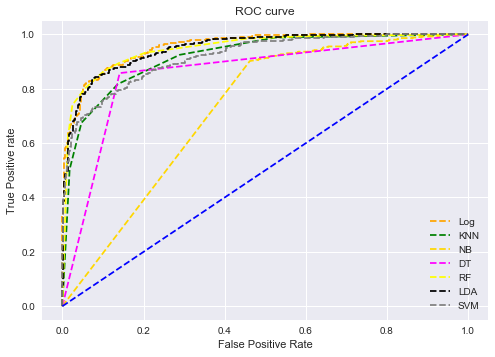

In [192]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Log')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='gold', label='NB')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='DT')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='RF')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='LDA')
plt.plot(fpr7, tpr7, linestyle='--',color='gray', label='SVM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In the above ROC curve, we can see that the top performing default classifiers, in terms of true positive rate, are:

    1.) Logisitic Regression
    2.) Random Forest
    3.) Linear Discriminant Analysis

The worst performing classifier in terms of the ROC curve was Naive Bayes. 

## "Best" Model ROC Curve

In [193]:
logclf = LogisticRegression(C = 50)
logclf.fit(Xtrain,yTrain)

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [194]:
knnclf = neighbors.KNeighborsClassifier(n_neighbors = 9) 
knnclf.fit(Xtrain,yTrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [195]:
bagging = BaggingClassifier(naive_bayes.GaussianNB())
bagging.fit(Xtrain, yTrain)

BaggingClassifier(base_estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [196]:
treeclf = DecisionTreeClassifier(min_samples_split = 250, max_depth = 3) 
treeclf.fit(Xtrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=250,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [197]:
rfclf = RandomForestClassifier(min_samples_split = 150,max_depth = 7, n_estimators = 50)
rfclf.fit(Xtrain,yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=150,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [198]:
ldclf = LinearDiscriminantAnalysis()
ldclf.fit(Xtrain,yTrain)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [199]:
svmclf = svm.SVC(C = 200, random_state = 33,probability = True)
svmclf.fit(Xtrain,yTrain)

SVC(C=200, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=33,
    shrinking=True, tol=0.001, verbose=False)

In [200]:
logpred_prob = logclf.predict_proba(Xtest)
knnpred_prob = knnclf.predict_proba(Xtest)
bagging_prob = bagging.predict_proba(Xtest)
treepred_prob = treeclf.predict_proba(Xtest)
rfpred_prob = rfclf.predict_proba(Xtest)
ldapred_prob = ldclf.predict_proba(Xtest)
svmpred_prob = svmclf.predict_proba(Xtest)

In [201]:
random_probs = [0 for i in range(len(yTest))] #blue line for guide if usesful
p_fpr, p_tpr, _ = roc_curve(yTest, random_probs, pos_label='Above')

In [202]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(yTest, logpred_prob[:,1], pos_label='Low Income')
fpr2, tpr2, thresh2 = roc_curve(yTest, knnpred_prob[:,1], pos_label='Low Income')
fpr3, tpr3, thresh3 = roc_curve(yTest, bagging_prob[:,1], pos_label='Low Income')
fpr4, tpr4, thresh4 = roc_curve(yTest, treepred_prob[:,1], pos_label='Low Income')
fpr5, tpr5, thresh5 = roc_curve(yTest, rfpred_prob[:,1], pos_label='Low Income')
fpr6, tpr6, thresh6 = roc_curve(yTest, ldapred_prob[:,1], pos_label='Low Income')
fpr7, tpr7, thresh7 = roc_curve(yTest, svmpred_prob[:,1], pos_label='Low Income')

In [203]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(yTest, logpred_prob[:,1])
auc_score2 = roc_auc_score(yTest, knnpred_prob[:,1])
auc_score3 = roc_auc_score(yTest, bagging_prob[:,1])
auc_score4 = roc_auc_score(yTest, treepred_prob[:,1])
auc_score5 = roc_auc_score(yTest, rfpred_prob[:,1])
auc_score6 = roc_auc_score(yTest, ldapred_prob[:,1])
auc_score7 = roc_auc_score(yTest, svmpred_prob[:,1])

labels = ['LOG','KNN','NB','DT','RF','LDA','SVM']
auc_lst = [auc_score1,auc_score2,auc_score3,auc_score4,auc_score5,auc_score6,auc_score7]
auc_dict = {}
for a,b in zip(labels,auc_lst):
    auc_dict[a] = b
print(auc_dict)

{'LOG': 0.9671697136943773, 'KNN': 0.9146904104863747, 'NB': 0.7860964987926872, 'DT': 0.9111590203518456, 'RF': 0.9537556053811658, 'LDA': 0.9494567092100725, 'SVM': 0.9635046567781994}


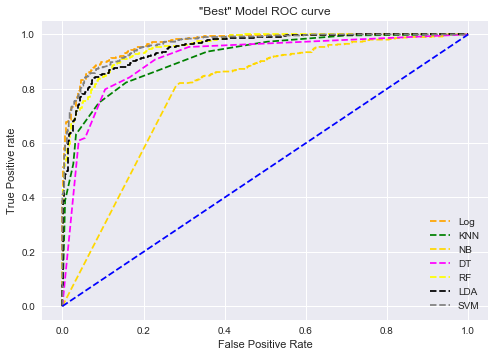

In [204]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Log')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(fpr3, tpr3, linestyle='--',color='gold', label='NB')
plt.plot(fpr4, tpr4, linestyle='--',color='magenta', label='DT')
plt.plot(fpr5, tpr5, linestyle='--',color='yellow', label='RF')
plt.plot(fpr6, tpr6, linestyle='--',color='black', label='LDA')
plt.plot(fpr7, tpr7, linestyle='--',color='gray', label='SVM')

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('"Best" Model ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.show();

In the above ROC curve, we can see that the top performing default classifiers, in terms of true positive rate, are:

    1.) Logisitic Regression
    2.) Support Vector Machine
    3.) Random Forest 

The worst performing classifier in terms of the ROC curve was, again, Naive Bayes.

## Research Questions 2 through 4 - Regression

Linear Regression will be applied for research questions 2 through 4. The below will summarize the proceses we will explore:

    Research Question #2  - Linear Regression & Regularized Regression
    Research Question #3  - Linear Regression & PCA
    Research Question #4  - Linear Regression & Random Forest Regressor

### Reasearch Question #2

Can the economic wellbeing of counties in a state predict the household income?

We defined economic well being as below:

    1.) Poverty
    2.) ChildPoverty
    3.) Unemployment
    
We didn't want to use any direct income atrributes, as those would be to heavily correlated.

In [205]:
df_X_normR = df_X_norm.copy()
df_yR = df_perc2.Income
df_X_normR.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [206]:
df_X_normR = df_X_normR.drop(columns=['IncomeErr','IncomePerCap','IncomePerCapErr']) #to not overfit data

In [207]:
df_yR.head()

CountyId
1001    55317
1003    52562
1005    33368
1007    43404
1009    47412
Name: Income, dtype: int64

In [208]:
df_yR = np.array(df_yR)
df_yR = df_yR.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler().fit(df_yR)
df_yR_norm = min_max_scaler.transform(df_yR)

In [209]:
df_yR_norm

array([[0.37009363],
       [0.34672796],
       [0.18394002],
       ...,
       [0.069656  ],
       [0.03312752],
       [0.02350137]])

In [210]:
#add columns of ones for x0 in regression formula
df_X_normR['Ones'] = 1
df_X_normR.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Ones
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1003,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1005,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1007,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1009,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [211]:
#Economic Well Being
df_X_WB = df_X_normR[['Poverty','ChildPoverty','Unemployment','Ones']]
df_X_WB.head()

,Poverty,ChildPoverty,Unemployment,Ones
CountyId,,,,
1001,0.179936,0.240431,0.127139,1
1003,0.149682,0.192584,0.134474,1
1005,0.394904,0.537081,0.303178,1
1007,0.203822,0.318182,0.200489,1
1009,0.210191,0.303828,0.119804,1


In [212]:
XtrainR, XtestR, yTrainR, yTestR = train_test_split(df_X_WB,df_yR_norm, test_size=0.3, random_state=33) #updated test sample to 30%

In [213]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
linreg = LinearRegression()

In [214]:
linreg.fit(XtrainR,yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
#coefficients
w = np.mat(linreg.coef_)
w = w.T

In [216]:
from sklearn.metrics import mean_squared_error
from math import *
p = linreg.predict(XtrainR)
error = sqrt(mean_squared_error(yTrainR,p))
print('Default Regression RMSE on Train (Economic Well Being):\n',round(error,2))

Default Regression RMSE on Train (Economic Well Being):
 0.07


In [217]:
yMat = np.mat(yTrainR)
yMat = yMat.A.ravel()

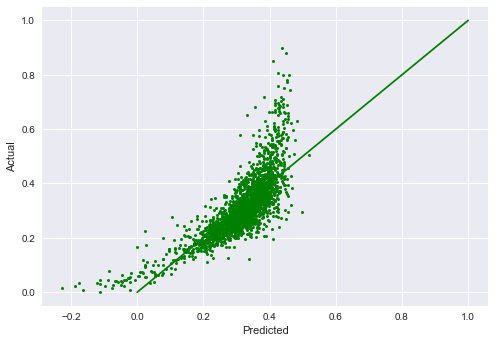

In [218]:
plt.plot(p,yMat,'go',markersize = 3)
plt.plot([0,1],[0,1],'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

We can see in the above fit plot that, that it relatively fits the line of part of it, then drifts off, meaning a higher error. 

In [219]:
p_test = linreg.predict(XtestR)
error = sqrt(mean_squared_error(yTestR,p_test))
print('Default Regression RMSE on Test (Economic Well Being):\n',round(error,2))

Default Regression RMSE on Test (Economic Well Being):
 0.08


In [220]:
p_train = linreg.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train))
reg_r2_train = r2_score(yTrainR,p_train)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.07
R-squared on Training Set:
 0.6051088126398747


In [221]:
p_test = linreg.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_test))
reg_r2_test = r2_score(yTestR,p_test)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.08
R-squared on Testing Set:
 0.5922764026469929


With an R squared on the training and test set, we can interpret that our 59% of our variance is currently explained by our model.


We will try regularized regresion along with some parameter tuning that will most likely end some form of elasic net regression.

In [222]:
ridge = Ridge()
lasso = Lasso()

In [223]:
ridge.fit(XtrainR,yTrainR)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [224]:
lasso.fit(XtrainR,yTrainR)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [225]:
p_train_ridge = ridge.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train_ridge))
reg_r2_train = r2_score(yTrainR,p_train_ridge)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.07
R-squared on Training Set:
 0.6042435551962866


In [226]:
p_train_lasso = lasso.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train_lasso))
reg_r2_train = r2_score(yTrainR,p_train_lasso)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.11
R-squared on Training Set:
 0.0


In [227]:
p_test_ridge = ridge.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_test_ridge))
reg_r2_test = r2_score(yTestR,p_test_ridge)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.08
R-squared on Testing Set:
 0.5914439977126011


In [228]:
p_test_lasso = lasso.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_test_lasso))
reg_r2_test = r2_score(yTestR,p_test_lasso)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.12
R-squared on Testing Set:
 -5.504470086625801e-06


We see pretty similar results with Ridge Regression, and results that are not very good with Lasso regression. 

### Research Question #3 

Can the household income of a county be predicted by types of work, employment factors, commute types, or
geographic location? 

We will use the entirety of the dataset instead to see what factors help predict this. 

In [229]:
#regression split
XtrainR, XtestR, yTrainR, yTestR = train_test_split(df_X_normR,df_yR_norm, test_size=0.3, random_state=33) #updated test sample to 30%

In [230]:
col_name = []
col_count = 0
for col in XtrainR:
    col_count+=1
    col_name.append(col)
print(col_name)
print(col_count)

['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'VotingAgeCitizen', 'Poverty', 'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction', 'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed', 'FamilyWork', 'Unemployment', 'State_Alabama', 'State_Alaska', 'State_Arizona', 'State_Arkansas', 'State_California', 'State_Colorado', 'State_Connecticut', 'State_Delaware', 'State_District of Columbia', 'State_Florida', 'State_Georgia', 'State_Hawaii', 'State_Idaho', 'State_Illinois', 'State_Indiana', 'State_Iowa', 'State_Kansas', 'State_Kentucky', 'State_Louisiana', 'State_Maine', 'State_Maryland', 'State_Massachusetts', 'State_Michigan', 'State_Minnesota', 'State_Mississippi', 'State_Missouri', 'State_Montana', 'State_Nebraska', 'State_Nevada', 'State_New Hampshire', 'State_New Jersey', 'State_New Mexico', 'State_New York', 'State_North Carolina

In [231]:
linreg = LinearRegression()

In [232]:
linreg.fit(XtrainR,yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [233]:
#coefficients
w = np.mat(linreg.coef_)
w = w.T

In [234]:
p = linreg.predict(XtrainR)
error = sqrt(mean_squared_error(yTrainR,p))
print('Default Regression RMSE on Train:\n',round(error,2))

Default Regression RMSE on Train:
 0.04


In [235]:
yMat = np.mat(yTrainR)
yMat = yMat.A.ravel()

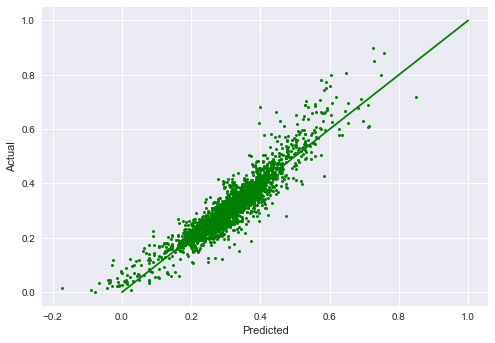

In [236]:
plt.plot(p,yMat,'go',markersize = 3)
plt.plot([0,1],[0,1],'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The above visualization shows how how close we are when we predict on the training set. We can see that a lot of the predictions are close to the regression line. As the predictions get higher though, we start see that the predictions get further away. 

In [237]:
p_test = linreg.predict(XtestR)
error = sqrt(mean_squared_error(yTestR,p_test))
print('Default Regression RMSE on Test:\n',round(error,2))

Default Regression RMSE on Test:
 0.05


In [238]:
p_train = linreg.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train))
reg_r2_train = r2_score(yTrainR,p_train)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.04
R-squared on Training Set:
 0.8543097323800672


In [239]:
p_test = linreg.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_test))
reg_r2_test = r2_score(yTestR,p_test)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.05
R-squared on Testing Set:
 0.8427849676557277


**Research Question # 3 Analysis**

With an adjusted R squared on the training set, we can interpret that our 85% of our variance is currently explained by our model. 

In the next steps of the project we plan to interpret what variables capture the most of this variance, and will see if we can execute some dimensionality reduction. 

**Research Question # 3 - PCA**

The type of dimensionality reduction I will be performing in Principal Component Analysis (PCA). One of the main objectives of PCA is to figure out "how many axes are needed?", as we want to reduce the number of measurements. This is accomplished in PCA by re-measuring the data so the data is along axes that can explain a majority of the variance. It is important to note that the eigenvectors of the covariance matrix perform the measurement of the direction of the variance. 

0 0
0.09754223195133722 1
0.15877399351031626 2
0.20572333930508382 3
0.24428743299584593 4
0.2795739747229909 5
0.3106440128013229 6
0.34042896413909224 7
0.36973018107522876 8
0.3957362703621422 9
0.4206945029317324 10
0.44670344631777104 11
0.47068518885137567 12
0.4945095026762945 13
0.5175884635863931 14
0.5398195107705752 15
0.5614931859788564 16
0.5825255482805691 17
0.6015256641269553 18
0.6204674045156835 19
0.6381033101692322 20
0.6567928107965494 21
0.6733885424953733 22
0.6908371246409942 23
0.7071432890123583 24
0.7235956536164302 25
0.7398090557751583 26
0.7551864352696263 27
0.7706910817876398 28
0.7858610926450619 29
0.800237862499953 30
0.8138221422236018 31
0.8267911321284585 32
0.8391286346621089 33
0.8504343868912668 34
0.8610578847463898 35
0.8711935821666759 36
0.8806769155268859 37
0.8894781836495365 38
0.8974157090887236 39
0.9051299218917231 40
0.9114733319674683 41
0.9177111453114576 42
0.92365897683399 43
0.9290896124420542 44
0.9341426646721264 45
0.93913255

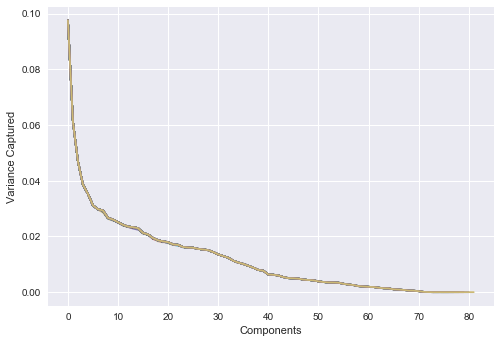

In [240]:
from sklearn.decomposition import PCA
comp = [*range(0,col_count,1)]
for i in comp:
    pca = PCA(n_components=i)
    pca.fit(XtrainR)
    variance = pca.explained_variance_ratio_
    print(sum(variance),i)
    plt.plot(variance)
    plt.xlabel('Components')
    plt.ylabel('Variance Captured')

In [241]:
cumsum = np.cumsum(variance)
Dim = np.argmax(cumsum>= .91) # .96 threshold, b/c max on test was .96 at K = 10
print(Dim)

40


In [242]:
pca = PCA(n_components=Dim)
pca.fit(XtrainR)
X_train_pca = pca.transform(XtrainR)
X_test_pca = pca.transform(XtestR)

In [243]:
reg_pca = LinearRegression()

In [244]:
reg_pca.fit(X_train_pca,yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [245]:
p_train = reg_pca.predict(X_train_pca)
regpca_rmse_train = sqrt(mean_squared_error(yTrainR,p_train))
regpca_r2_train = r2_score(yTrainR,p_train)
print('Linear Regression RMSE on Training Data:\n',round(reg_rmse_train,2))
print('Linear Regression R-squared on Training Set:\n',reg_r2_train)
print('\n\nLinear Regression PCA RMSE on Training Data:\n',round(regpca_rmse_train,2))
print('Linear Regression PCA R-squared on Training Set:\n',regpca_r2_train)

Linear Regression RMSE on Training Data:
 0.04
Linear Regression R-squared on Training Set:
 0.8543097323800672


Linear Regression PCA RMSE on Training Data:
 0.05
Linear Regression PCA R-squared on Training Set:
 0.8029716067997984


In [246]:
p_train = reg_pca.predict(X_test_pca)
regpca_rmse_test = sqrt(mean_squared_error(yTestR,p_train))
regpca_r2_test = r2_score(yTestR,p_train)
print('Linear Regression RMSE on Testing Set:\n',round(reg_rmse_test,2))
print('Linear Regression R-squared on Testing Set:\n',reg_r2_test)
print('\n\nLinear Regression PCA RMSE on Test Set:\n',round(regpca_rmse_test,2))
print('Linear Regression PCA R-squared on Test Set:\n',regpca_r2_test)

Linear Regression RMSE on Testing Set:
 0.05
Linear Regression R-squared on Testing Set:
 0.8427849676557277


Linear Regression PCA RMSE on Test Set:
 0.06
Linear Regression PCA R-squared on Test Set:
 0.80085095250267


**Research Question #3 - PCA Analysis**

As shown above, can see that using around %50 of our features we are still able to have a pretty decent R2. This means our data is more interpretable. Specically to the PCA R2, we can say that 80% of our variance is explained by our model. 

### Research Question #4


Do the same features that predict the overall predict poverty rate also predict child poverty rate? In other words, will R2 and RMSE be similar between Poverty and ChildPoverty when they are dependent variables?

In [247]:
df_X_normR = df_X_norm.copy()
df_y_pov = df_perc2.Poverty
df_y_child_pov = df_perc2.ChildPoverty
df_X_normR.head()

,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,VotingAgeCitizen,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming
CountyId,,,,,,,,,,,,,,,,,,,,,
1001,0.005439,0.005394,0.005482,0.027,0.754,0.217491,0.003322,0.021531,0.0,0.006587,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1003,0.020116,0.019979,0.020249,0.044,0.831,0.109321,0.008859,0.016746,0.0,0.024978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1005,0.002585,0.002799,0.002378,0.042,0.457,0.550058,0.002215,0.014354,0.0,0.003250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1007,0.002227,0.002452,0.002008,0.024,0.746,0.253165,0.004430,0.000000,0.0,0.002831,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1009,0.005699,0.005714,0.005685,0.090,0.874,0.017261,0.003322,0.002392,0.0,0.006827,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [248]:
df_y_child_pov.fillna(0)

CountyId
1001     0.201
1003     0.161
1005     0.449
1007     0.266
1009     0.254
         ...  
72145    0.494
72147    0.682
72149    0.679
72151    0.621
72153    0.582
Name: ChildPoverty, Length: 3220, dtype: float64

In [249]:
df_X_normR = df_X_normR.drop(columns=['Poverty','ChildPoverty','IncomeErr','IncomePerCap','IncomePerCapErr']) #to not overfit data

In [250]:
df_y_pov.head()

CountyId
1001    0.137
1003    0.118
1005    0.272
1007    0.152
1009    0.156
Name: Poverty, dtype: float64

In [251]:
df_y_child_pov.head()

CountyId
1001    0.201
1003    0.161
1005    0.449
1007    0.266
1009    0.254
Name: ChildPoverty, dtype: float64

**a.) Predicting Poverty**

In [252]:
df_yR = np.array(df_y_pov)
df_yR = df_yR.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler().fit(df_yR)
df_yR_norm = min_max_scaler.transform(df_yR)

In [253]:
XtrainR, XtestR, yTrainR, yTestR = train_test_split(df_X_normR,df_yR_norm, test_size=0.3, random_state=33) #updated test sample to 30%

In [254]:
df_yR_norm

array([[0.17993631],
       [0.14968153],
       [0.39490446],
       ...,
       [0.75796178],
       [0.79617834],
       [0.76433121]])

In [255]:
linreg = LinearRegression()

In [256]:
linreg.fit(XtrainR,yTrainR)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
#coefficients
w = np.mat(linreg.coef_)
w = w.T

In [258]:
p = linreg.predict(XtrainR)
error = sqrt(mean_squared_error(yTrainR,p))
print('Default Regression RMSE on Train:\n',round(error,2))

Default Regression RMSE on Train:
 0.06


In [259]:
yMat = np.mat(yTrainR)
yMat = yMat.A.ravel()

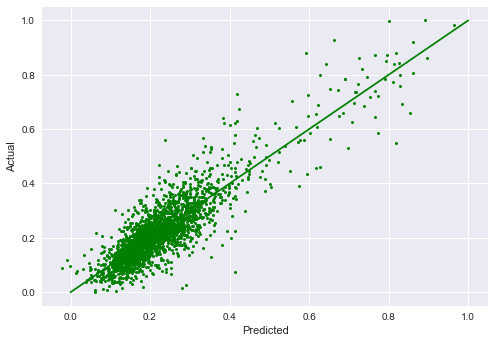

In [260]:
plt.plot(p,yMat,'go',markersize = 3)
plt.plot([0,1],[0,1],'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [261]:
p_test = linreg.predict(XtestR)
error = sqrt(mean_squared_error(yTestR,p_test))
print('Default Regression RMSE on Test:\n',round(error,2))

Default Regression RMSE on Test:
 0.06


In [262]:
p_train = linreg.predict(XtrainR)
reg_rmse_train = sqrt(mean_squared_error(yTrainR,p_train))
reg_r2_train = r2_score(yTrainR,p_train)
print('RMSE on Training Data:\n',round(reg_rmse_train,2))
print('R-squared on Training Set:\n',reg_r2_train)

RMSE on Training Data:
 0.06
R-squared on Training Set:
 0.7780281078416896


In [263]:
p_test = linreg.predict(XtestR)
reg_rmse_test = sqrt(mean_squared_error(yTestR,p_test))
reg_r2_test = r2_score(yTestR,p_test)
print('RMSE on Testing Data:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set:\n',reg_r2_test)

RMSE on Testing Data:
 0.06
R-squared on Testing Set:
 0.7906914982905953


**b.) Predicting Child Poverty**

In [264]:
df_y_child_pov.isnull().sum()

1

In [265]:
df_y_child_pov.fillna(0, inplace= True)

In [266]:
df_y_child_pov.isnull().sum()

0

In [267]:
df_yR = np.array(df_y_child_pov)
df_yR = df_yR.reshape(-1,1)
min_max_scaler = preprocessing.MinMaxScaler().fit(df_yR)
df_yR_norm = min_max_scaler.transform(df_yR)

In [268]:
XtrainR_child, XtestR_child, yTrainR_child, yTestR_child = train_test_split(df_X_normR,df_yR_norm, test_size=0.3, random_state=33) #updated test sample to 30%

In [269]:
linreg = LinearRegression()

In [270]:
linreg.fit(XtrainR_child,yTrainR_child)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
np.any(np.isnan(yTrainR_child))

False

In [272]:
np.any(np.isfinite(yTrainR_child))

True

In [273]:
#coefficients
w = np.mat(linreg.coef_)
w = w.T

In [274]:
p = linreg.predict(XtrainR_child)
error = sqrt(mean_squared_error(yTrainR,p))
print('Default Regression RMSE on Train:\n',round(error,2))

Default Regression RMSE on Train:
 0.08


In [275]:
yMat = np.mat(yTrainR_child)
yMat = yMat.A.ravel()

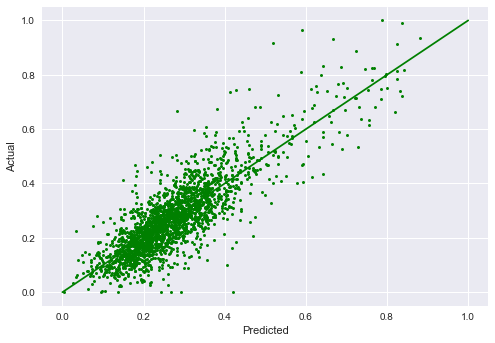

In [276]:
plt.plot(p,yMat,'go',markersize = 3)
plt.plot([0,1],[0,1],'g-')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [277]:
p_test_child = linreg.predict(XtestR_child)
error = sqrt(mean_squared_error(yTestR,p_test_child))
print('Default Regression RMSE on Test:\n',round(error,2))

Default Regression RMSE on Test:
 0.08


In [278]:
print('RMSE on Training Data - Poverty:\n',round(reg_rmse_train,2))
print('R-squared on Training Set - Poverty:\n',reg_r2_train)
p_train_child = linreg.predict(XtrainR_child)
reg_rmse_train_child = sqrt(mean_squared_error(yTrainR_child,p_train_child))
reg_r2_train_child = r2_score(yTrainR_child,p_train_child)
print('\nRMSE on Training Data - Child Poverty:\n',round(reg_rmse_train_child,2))
print('R-squared on Training Set - Child Poverty:\n',reg_r2_train_child)

RMSE on Training Data - Poverty:
 0.06
R-squared on Training Set - Poverty:
 0.7780281078416896

RMSE on Training Data - Child Poverty:
 0.08
R-squared on Training Set - Child Poverty:
 0.7106713858351886


In [279]:
print('RMSE on Testing Data - Poverty:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set - Poverty:\n',reg_r2_test)
p_test_child = linreg.predict(XtestR_child)
reg_rmse_test_child = sqrt(mean_squared_error(yTestR_child,p_test_child))
reg_r2_test_child = r2_score(yTestR_child,p_test_child)
print('\nRMSE on Testing Data - Child Poverty:\n',round(reg_rmse_test_child,2))
print('R-squared on Testing Set - Child Poverty:\n',reg_r2_test_child)

RMSE on Testing Data - Poverty:
 0.06
R-squared on Testing Set - Poverty:
 0.7906914982905953

RMSE on Testing Data - Child Poverty:
 0.08
R-squared on Testing Set - Child Poverty:
 0.732864743868143


As we can see, the R2 measures for predicicting poverty and child poverty are different. We are going to run another form of regression on Child Poverty, to see if we can increase R2. 

**Child Poverty - Random Forest Regressor**

In [280]:
from sklearn.ensemble import RandomForestRegressor

In [281]:
reg_forest = RandomForestRegressor(n_estimators=100)

In [282]:
reg_forest.fit(XtrainR_child,yTrainR_child)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [283]:
print('RMSE on Training Data - Poverty:\n',round(reg_rmse_train,2))
print('R-squared on Training Set - Poverty:\n',reg_r2_train)

print('\nRMSE on Training Data - Child Poverty:\n',round(reg_rmse_train_child,2))
print('R-squared on Training Set - Child Poverty:\n',reg_r2_train_child)

p_train_child_for = reg_forest.predict(XtrainR_child)
reg_rmse_train_child_for = sqrt(mean_squared_error(yTrainR_child,p_train_child_for))
reg_r2_train_child_for = r2_score(yTrainR_child,p_train_child_for)

print('\nRMSE on Training Data - Child Poverty Random Forest:\n',round(reg_rmse_train_child_for,2))
print('R-squared on Training Set - Child Poverty Random Forest:\n',reg_r2_train_child_for)

RMSE on Training Data - Poverty:
 0.06
R-squared on Training Set - Poverty:
 0.7780281078416896

RMSE on Training Data - Child Poverty:
 0.08
R-squared on Training Set - Child Poverty:
 0.7106713858351886

RMSE on Training Data - Child Poverty Random Forest:
 0.03
R-squared on Training Set - Child Poverty Random Forest:
 0.9552154508338268


In [284]:
print('RMSE on Testing Data - Poverty:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set - Poverty:\n',reg_r2_test)

print('\nRMSE on Testing Data - Child Poverty:\n',round(reg_rmse_test_child,2))
print('R-squared on Testing Set - Child Poverty:\n',reg_r2_test_child)

p_test_child_for = reg_forest.predict(XtestR_child)
reg_rmse_test_child_for = sqrt(mean_squared_error(yTestR_child,p_test_child_for))
reg_r2_test_child_for = r2_score(yTestR_child,p_test_child_for)

print('\nRMSE on Testing Data - Child Poverty Random Forest:\n',round(reg_rmse_test_child,2))
print('R-squared on Testing Set - Child Poverty Random Forest:\n',reg_r2_test_child_for)

RMSE on Testing Data - Poverty:
 0.06
R-squared on Testing Set - Poverty:
 0.7906914982905953

RMSE on Testing Data - Child Poverty:
 0.08
R-squared on Testing Set - Child Poverty:
 0.732864743868143

RMSE on Testing Data - Child Poverty Random Forest:
 0.08
R-squared on Testing Set - Child Poverty Random Forest:
 0.7066798391856173


In [285]:
reg_forest = RandomForestRegressor()

In [286]:
parameter = {'min_samples_split':[2,200,500],'max_depth':[10,50,100],'n_estimators':[10,90,180]}   

In [287]:
from sklearn.model_selection import GridSearchCV
grid_cv_forest_reg = GridSearchCV(estimator = reg_forest ,param_grid = parameter,cv = 5) #depth = parameter

In [288]:
grid_cv_forest_reg.fit(XtrainR_child, yTrainR_child)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [10, 50, 100],
   

In [289]:
grid_cv_forest_reg.cv_results_

{'mean_fit_time': array([0.15927072, 1.3948307 , 2.86954541, 0.08543382, 0.78151369,
        1.5512692 , 0.04168735, 0.46476388, 0.84015255, 0.23736014,
        2.08443298, 4.93549843, 0.08577008, 0.81699972, 1.4285645 ,
        0.04488764, 0.38258395, 0.75197978, 0.23398504, 2.09020109,
        4.12022033, 0.07959599, 0.70491414, 1.40684085, 0.04147353,
        0.37141504, 0.74580493]),
 'std_fit_time': array([0.00592471, 0.00536956, 0.0826475 , 0.01215038, 0.03782361,
        0.06743941, 0.00169155, 0.05321309, 0.02912421, 0.01376259,
        0.04182183, 0.25177487, 0.00209198, 0.04903802, 0.03491598,
        0.00140489, 0.01761394, 0.05239499, 0.00901054, 0.03584088,
        0.03761436, 0.00523075, 0.01563554, 0.0286094 , 0.00215679,
        0.01834289, 0.03308181]),
 'mean_score_time': array([0.00199509, 0.00870948, 0.0140893 , 0.        , 0.00518379,
        0.01015487, 0.00119796, 0.00518851, 0.00879278, 0.00199332,
        0.01096115, 0.02192912, 0.00180631, 0.00600004, 0.009176

In [290]:
best_rf_reg  = grid_cv_forest_reg.best_estimator_

In [291]:
best_rf_reg.fit(XtrainR_child, yTrainR_child)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=100,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=180,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [292]:
print('RMSE on Training Data - Poverty:\n',round(reg_rmse_train,2))
print('R-squared on Training Set - Poverty:\n',reg_r2_train)

print('\nRMSE on Training Data - Child Poverty:\n',round(reg_rmse_train_child,2))
print('R-squared on Training Set - Child Poverty:\n',reg_r2_train_child)


print('\nRMSE on Training Data - Child Poverty Random Forest:\n',round(reg_rmse_train_child_for,2))
print('R-squared on Training Set - Child Poverty Random Forest:\n',reg_r2_train_child_for)

best_p_train_child_for = best_rf_reg.predict(XtrainR_child)
best_reg_rmse_train_child_for = sqrt(mean_squared_error(yTrainR_child,best_p_train_child_for))
best_reg_r2_train_child_for = r2_score(yTrainR_child,best_p_train_child_for)

print('\nRMSE on Training Data - Child Poverty "Best" Random Forest :\n',round(best_reg_rmse_train_child_for,2))
print('R-squared on Training Set - Child Poverty "Best" Random Forest:\n',best_reg_r2_train_child_for)

RMSE on Training Data - Poverty:
 0.06
R-squared on Training Set - Poverty:
 0.7780281078416896

RMSE on Training Data - Child Poverty:
 0.08
R-squared on Training Set - Child Poverty:
 0.7106713858351886

RMSE on Training Data - Child Poverty Random Forest:
 0.03
R-squared on Training Set - Child Poverty Random Forest:
 0.9552154508338268

RMSE on Training Data - Child Poverty "Best" Random Forest :
 0.03
R-squared on Training Set - Child Poverty "Best" Random Forest:
 0.9571242211887232


In [293]:
print('RMSE on Testing Data - Poverty:\n',round(reg_rmse_test,2))
print('R-squared on Testing Set - Poverty:\n',reg_r2_test)

print('\nRMSE on Testing Data - Child Poverty:\n',round(reg_rmse_test_child,2))
print('R-squared on Testing Set - Child Poverty:\n',reg_r2_test_child)


print('\nRMSE on Testing Data - Child Poverty Random Forest:\n',round(reg_rmse_test_child,2))
print('R-squared on Testing Set - Child Poverty Random Forest:\n',reg_r2_test_child_for)

best_p_test_child_for = best_rf_reg.predict(XtestR_child)
best_reg_rmse_test_child_for = sqrt(mean_squared_error(yTestR_child,best_p_test_child_for))
best_reg_r2_test_child_for = r2_score(yTestR_child,best_p_test_child_for)
print('\nRMSE on Training Data - Child Poverty "Best" Random Forest :\n',round(best_reg_rmse_test_child_for,2))
print('R-squared on Training Set - Child Poverty "Best" Random Forest:\n',best_reg_r2_test_child_for)

RMSE on Testing Data - Poverty:
 0.06
R-squared on Testing Set - Poverty:
 0.7906914982905953

RMSE on Testing Data - Child Poverty:
 0.08
R-squared on Testing Set - Child Poverty:
 0.732864743868143

RMSE on Testing Data - Child Poverty Random Forest:
 0.08
R-squared on Testing Set - Child Poverty Random Forest:
 0.7066798391856173

RMSE on Training Data - Child Poverty "Best" Random Forest :
 0.08
R-squared on Training Set - Child Poverty "Best" Random Forest:
 0.7105518789725968


Even after tuning parameters, there is still a big gap training and test set for our random forest and "best" random forest regressor. We can interpret this as random forest overfitting our model. 

### Results &  Conclusion
**Main Problem Analysis - Classification**

In comparing all of the classification reports for the default parameters, we can see that Logisitic Regression and Random Forest have the highest accuracy. We can also see that they both hold the highest F1-Score. On the opposite end, we can see that Naive Bayes performs far worse in all categories compared to other classifiers. 
The summary of the accuracies, is below:

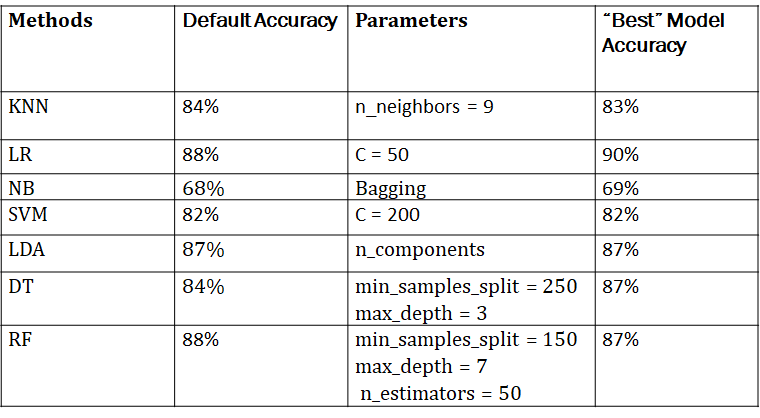

After tuning parameters, we can still see that paremeter tuned Logistic Regression, and default Random Forest held the highest accuracy. Decision Tree, Random Forest, and Linear Discriminant analysis all performed high as well, in terms of accuracy. This is shown below:

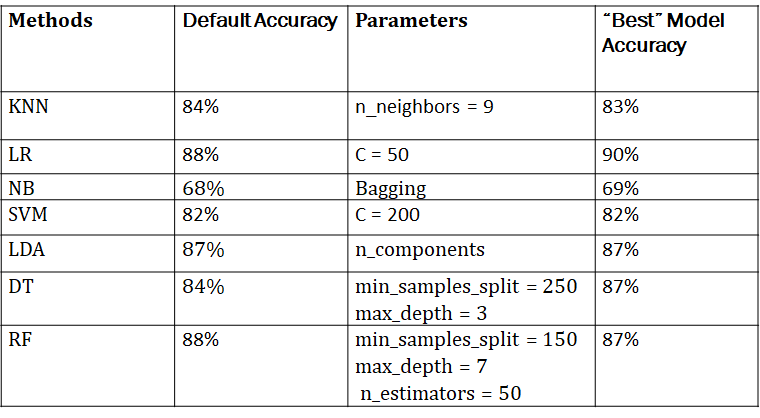

The result of our main problem has been analyzed and explained throughout the notebook. In regards to interpreting result, I was not expecting Logisitic Regression to perform so well in terms of accuracy and ability to separate the classes, as I expecting either Random Forest, or Support Vector Machine to perform better.

**Research Question 2 through 4 Summary**

**2.) Can the economic wellbeing of counties in a state predict the household income?**

The economic well being of counties did not do the best job predicting household income, as we had a R2 of around 60%. This somewhat makes sense because none of the factors that we used for economic well being were too heavily correlated with income. 
    
**3.) Can the household income of a county be predicted by our current model (edited from proposal submission)?**

As shown above, we believe that we have somewhat answered this research question, as our current model has a R2 of around  85%. We then performed PCA on this, using less than 50% of the data. The PCA model was able to achieve a R2 of 80% with only a slight increase in RMSE. 
    
    
**4. Do the same features that predict the overall predict poverty rate also predict child poverty rate?**

In answering this question, we compared the R2 values to see if they would be around the same. In our findings, we found that the test set R2 were 79% and 73% for Poverty and Child Poverty. This proved to us, that the same factors do not predict the rate of poverty and child poverty in a county. We attempted a random forest regressor for child poverty, which did not improve our results. 


**Overall**

In this project we were able to explore census data in multiude of ways, apply classification techniques to based on income, and look further into our research questions. If we had more time, we would have more EDA on at the state level. Also, we would explore further regression parameters with our research questions. 

### References
1. A.  Tuovila, "Real Income", Investopedia, 2019. [Online]. Available: https://www.investopedia.com/terms/r/realincome.asp. [Accessed: 01- Oct- 2020].
2. "Combining Data – A General Overview", The United States Census Bureau, 2019. [Online]. Available: https://www.census.gov/about/what/admin-data.html. [Accessed: 01- Oct- 2020].
3. "Building a Classifier from Census Data", Medium, 2017. [Online]. Available: https://medium.com/district-data-labs/building-a-classifier-from-census-data-18f996c4d7cf. [Accessed: 01- Oct- 2020].
4. B.  Chatterjee, "Did Suburbanization Cause Residential Segregation? Evidence from U.S. Metropolitan Areas", Review of Applied Socio-Economic Research, vol. 9, pp. 25-36, 2015. Available: https://www.semanticscholar.org/paper/Did-Suburbanization-Cause-Residential-Segregation-Chatterjee/071e45c948d3375f305c6903bf101a359629ea7c. [Accessed 1 October 2020].
  5. L.  Boustan, "Escape from the City? The Role of Race, Income, and Local Public Goods in Post-War Suburbanization", NBER Working Paper No. w13311, 2010. Available: https://papers.ssrn.com/sol3/papers.cfm?abstract_id=1008805. [Accessed 1 October 2020].
6. D.  McClish, "Analyzing a Portion of the ROC Curve", Medical Decision Making, vol. 9, no. 3, pp. 190-195, 1989. Available: https://journals.sagepub.com/doi/10.1177/0272989X8900900307. [Accessed 1 October 2020].
7. "REAL EARNINGS – AUGUST 2020", U.S. Bureau of Labor Statistics, 2020. [Online]. Available: https://www.bls.gov/news.release/pdf/realer.pdf. [Accessed: 01- Oct- 2020].